# Analysis of PnL

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from scipy.stats import skew, kurtosis

In [ ]:
forecast_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_strategies\corn_arma_ma\output\arma_(3,3)\forecasts_corn_(3, 3)_True_5.csv',parse_dates=True,index_col='asofdate')
pnl_df = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_strategies\corn_arma_ma\output\arma_(3,3)\pnl_test.csv',parse_dates=True,index_col='asofdate')


In [ ]:
def hitrate(pnl):

    up = 0
    down = 0
    for p in pnl:

        if p < 0:
            down+=1
        if p >= 0:
            up+=1

    return up / (up + down)
    

In [ ]:

def relativepnl(pnl):

    up = 0
    down = 0
    for p in pnl:

        if p < 0:
            down+=np.abs(p)
        if p >= 0:
            up+=np.abs(p)
    return up / (down)



In [ ]:
def roc(pnl):
    return pd.DataFrame(pnl).pct_change().dropna()

# Positions


In [ ]:
# Retrieve dataframe of positions
merge_df = pnl_df.merge(forecast_df, left_on='asofdate', right_on='asofdate')
positions = merge_df[(merge_df['forecastday'] == 5)][['pnl','pointForecast','forecastday','product_name']]


positions[positions['pnl']!=0]
volatility = (np.log(positions['pnl'].cumsum()/positions['pnl'].cumsum().shift(1))).dropna(axis=0).rolling(window=30).std(ddof=0)*np.sqrt(252)


c:\Users\James Stanley\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
positions.to_csv(r'positions.csv')

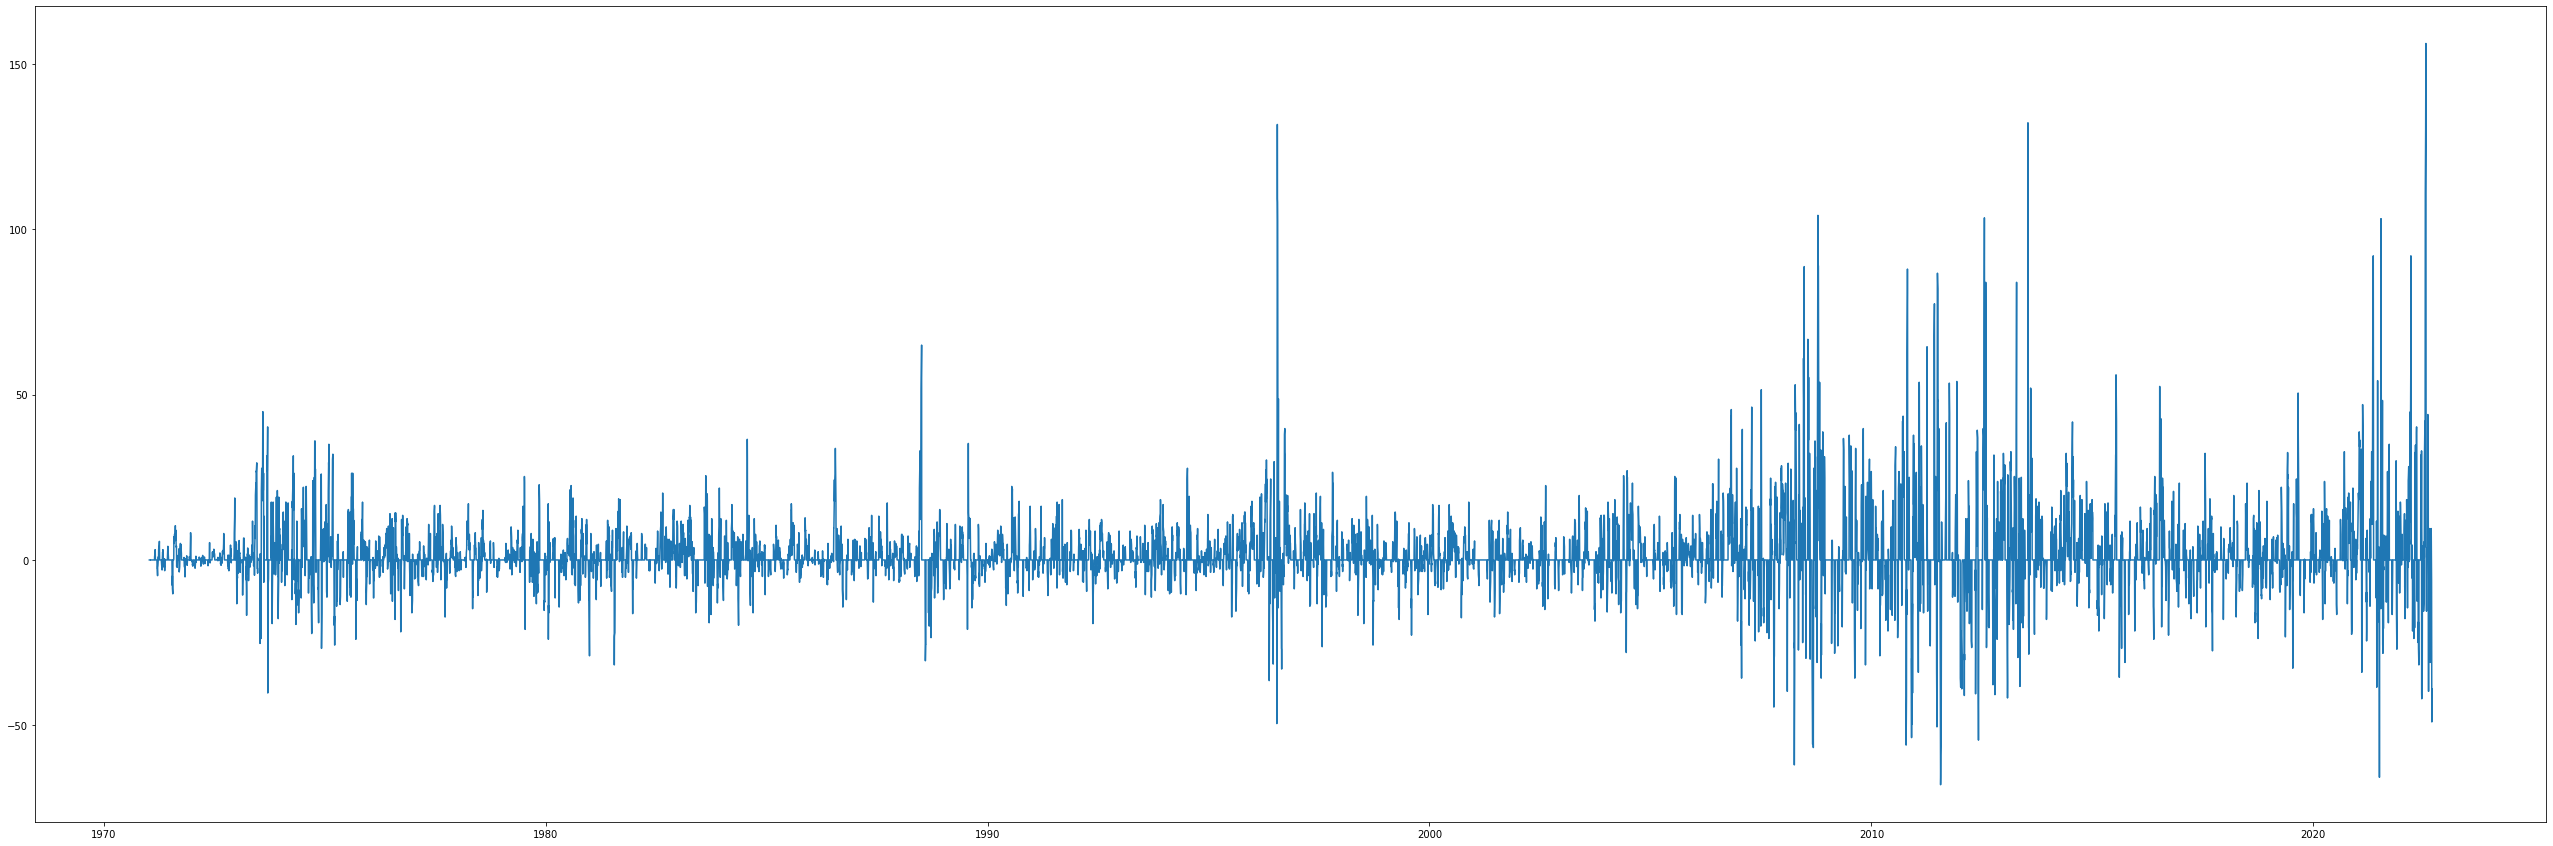

In [ ]:
plt.figure(figsize=(45,15))

plt.plot(pnl_df['pnl'])

plt.show()

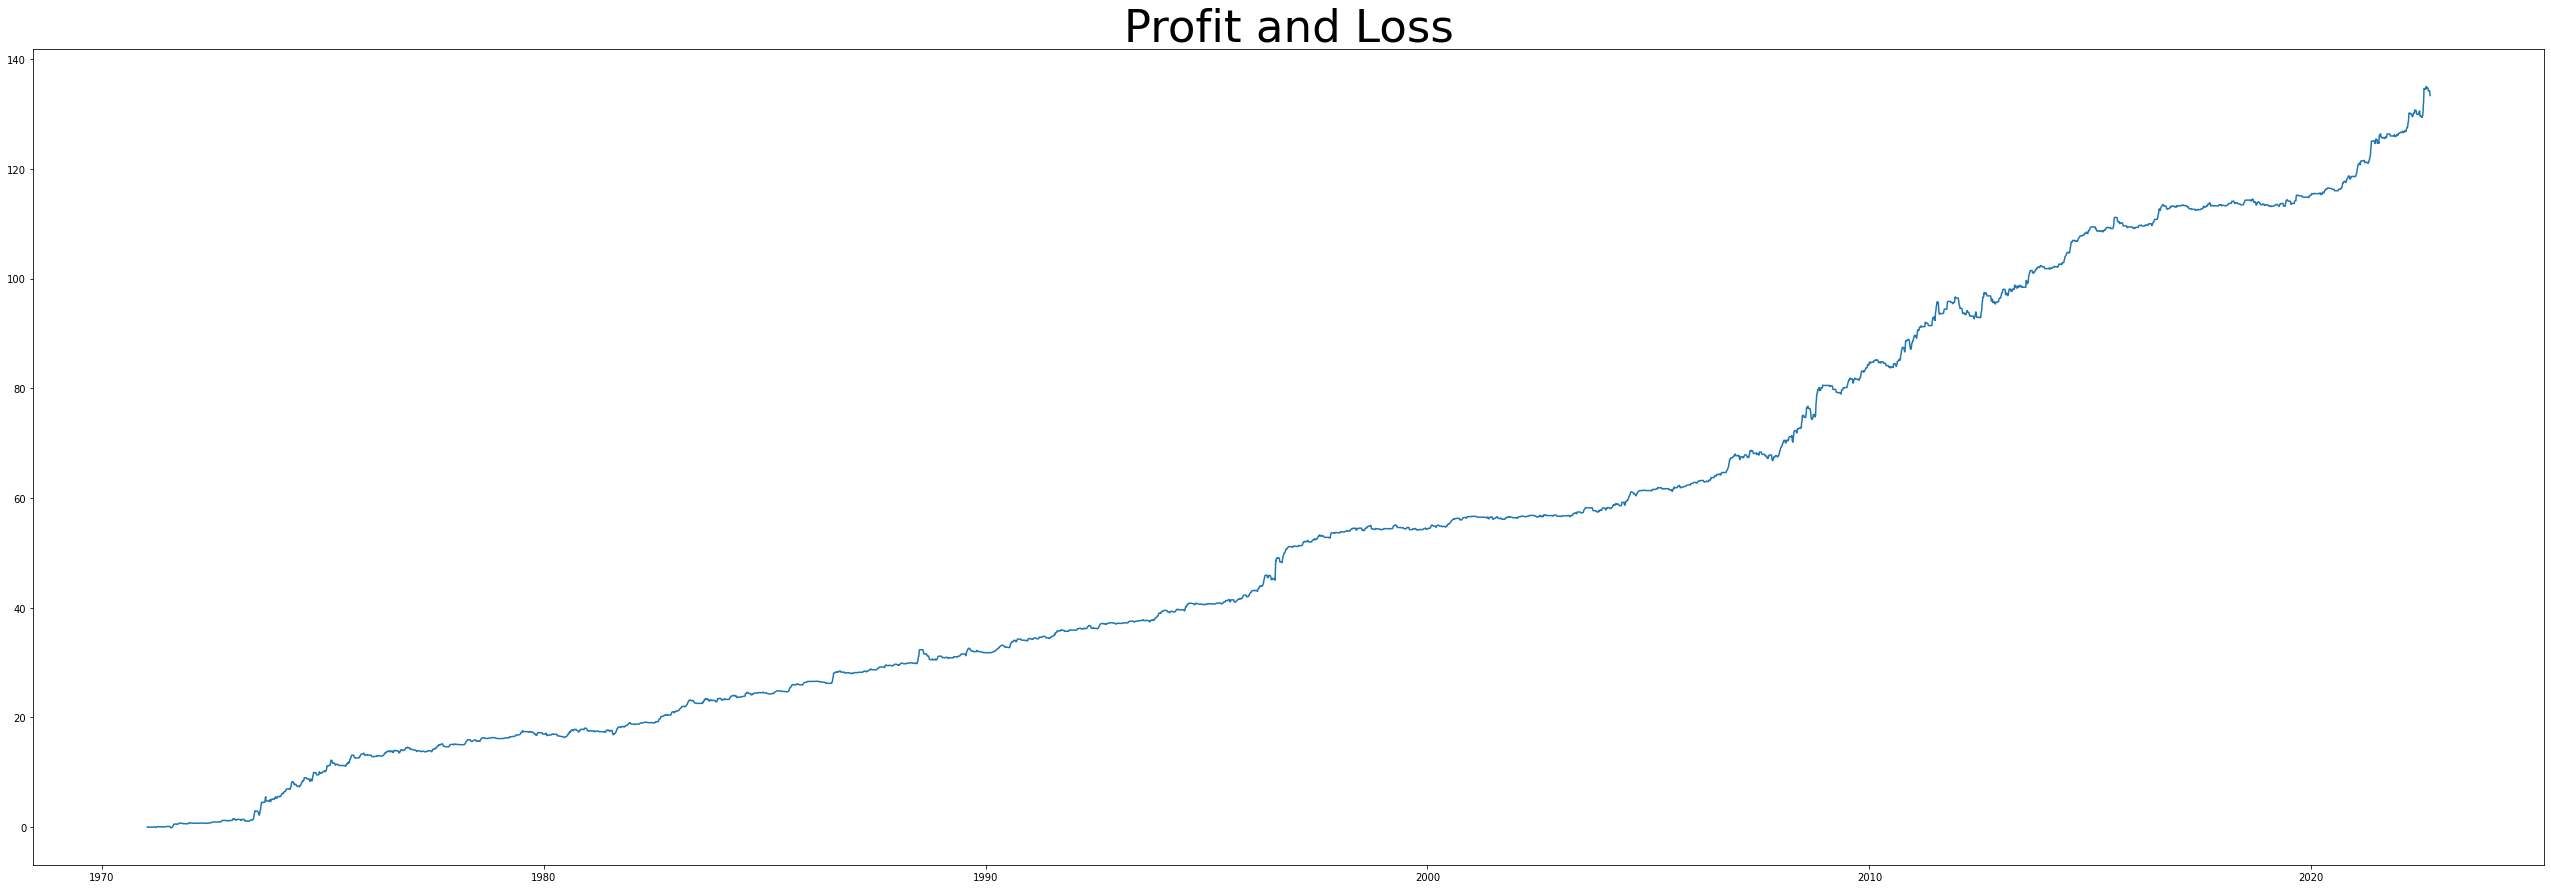

In [ ]:
# Cumulative PnL
cumulative_pnl=pnl_df['pnl'].cumsum()/forecast_df['close'][0]

plt.figure(figsize=(45,15))

plt.title('Profit and Loss',fontsize=45)
plt.plot(cumulative_pnl)
plt.show()

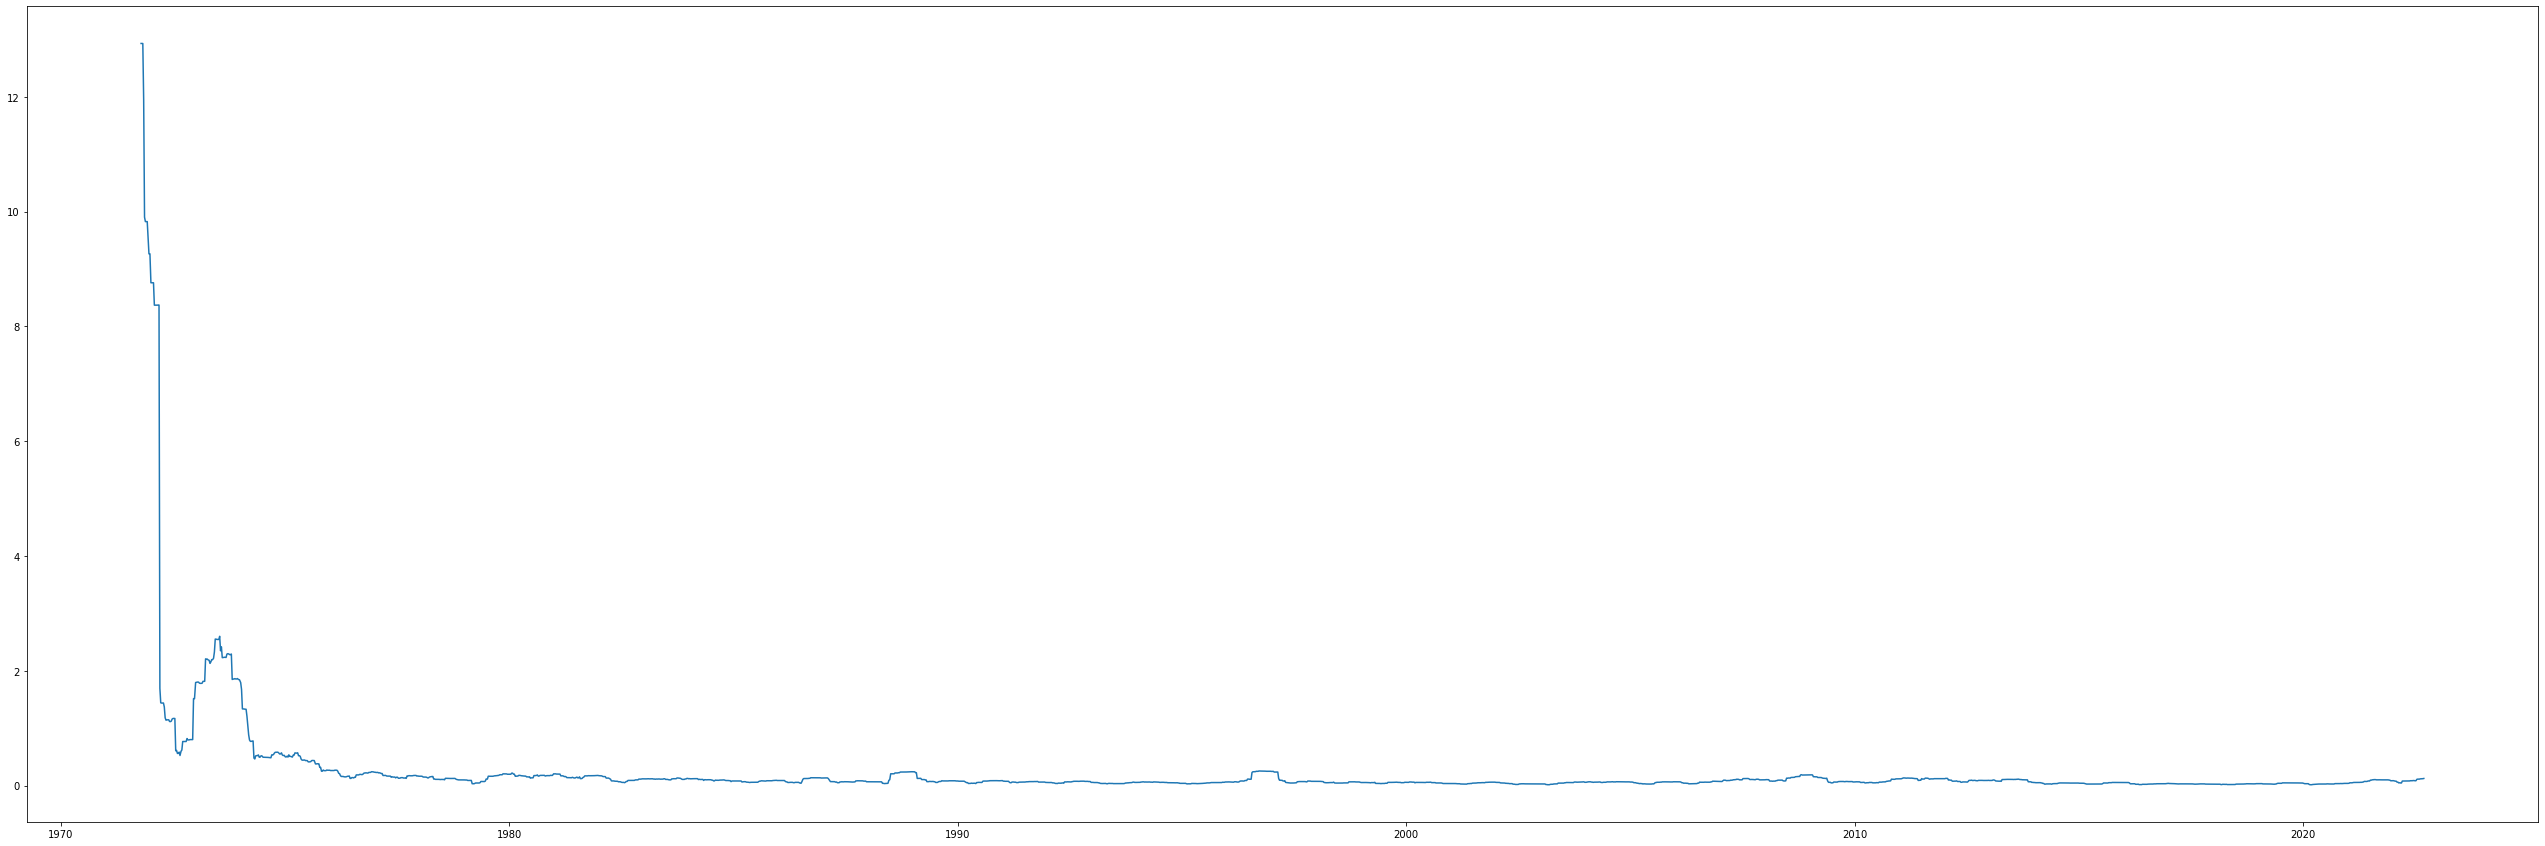

In [ ]:
plt.figure(figsize=(45,15))
plt.plot(volatility)
plt.show()

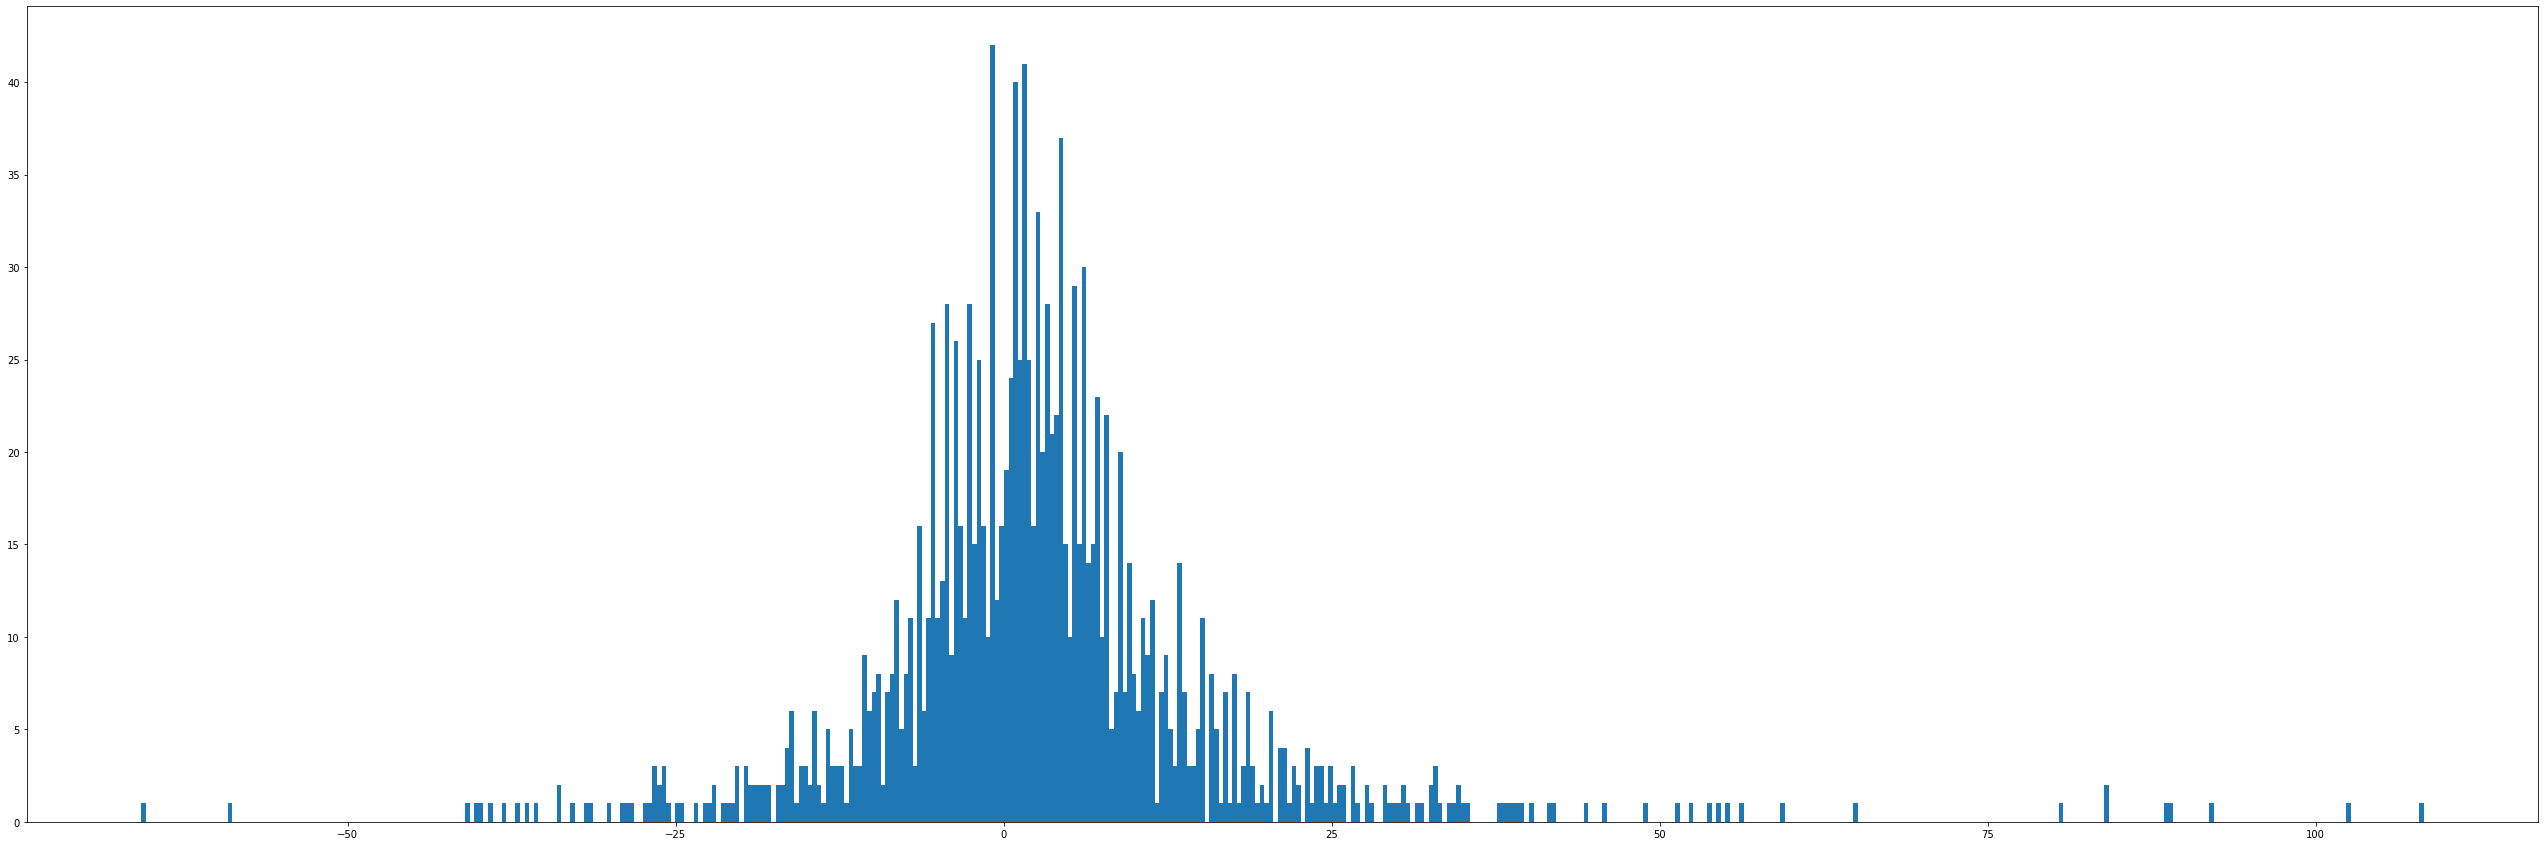

In [ ]:
plt.figure(figsize=(45,15))

plt.hist(positions['pnl'][positions['pnl'] != 0],bins=500)

plt.show()

# Compare MA, predictions & actual price

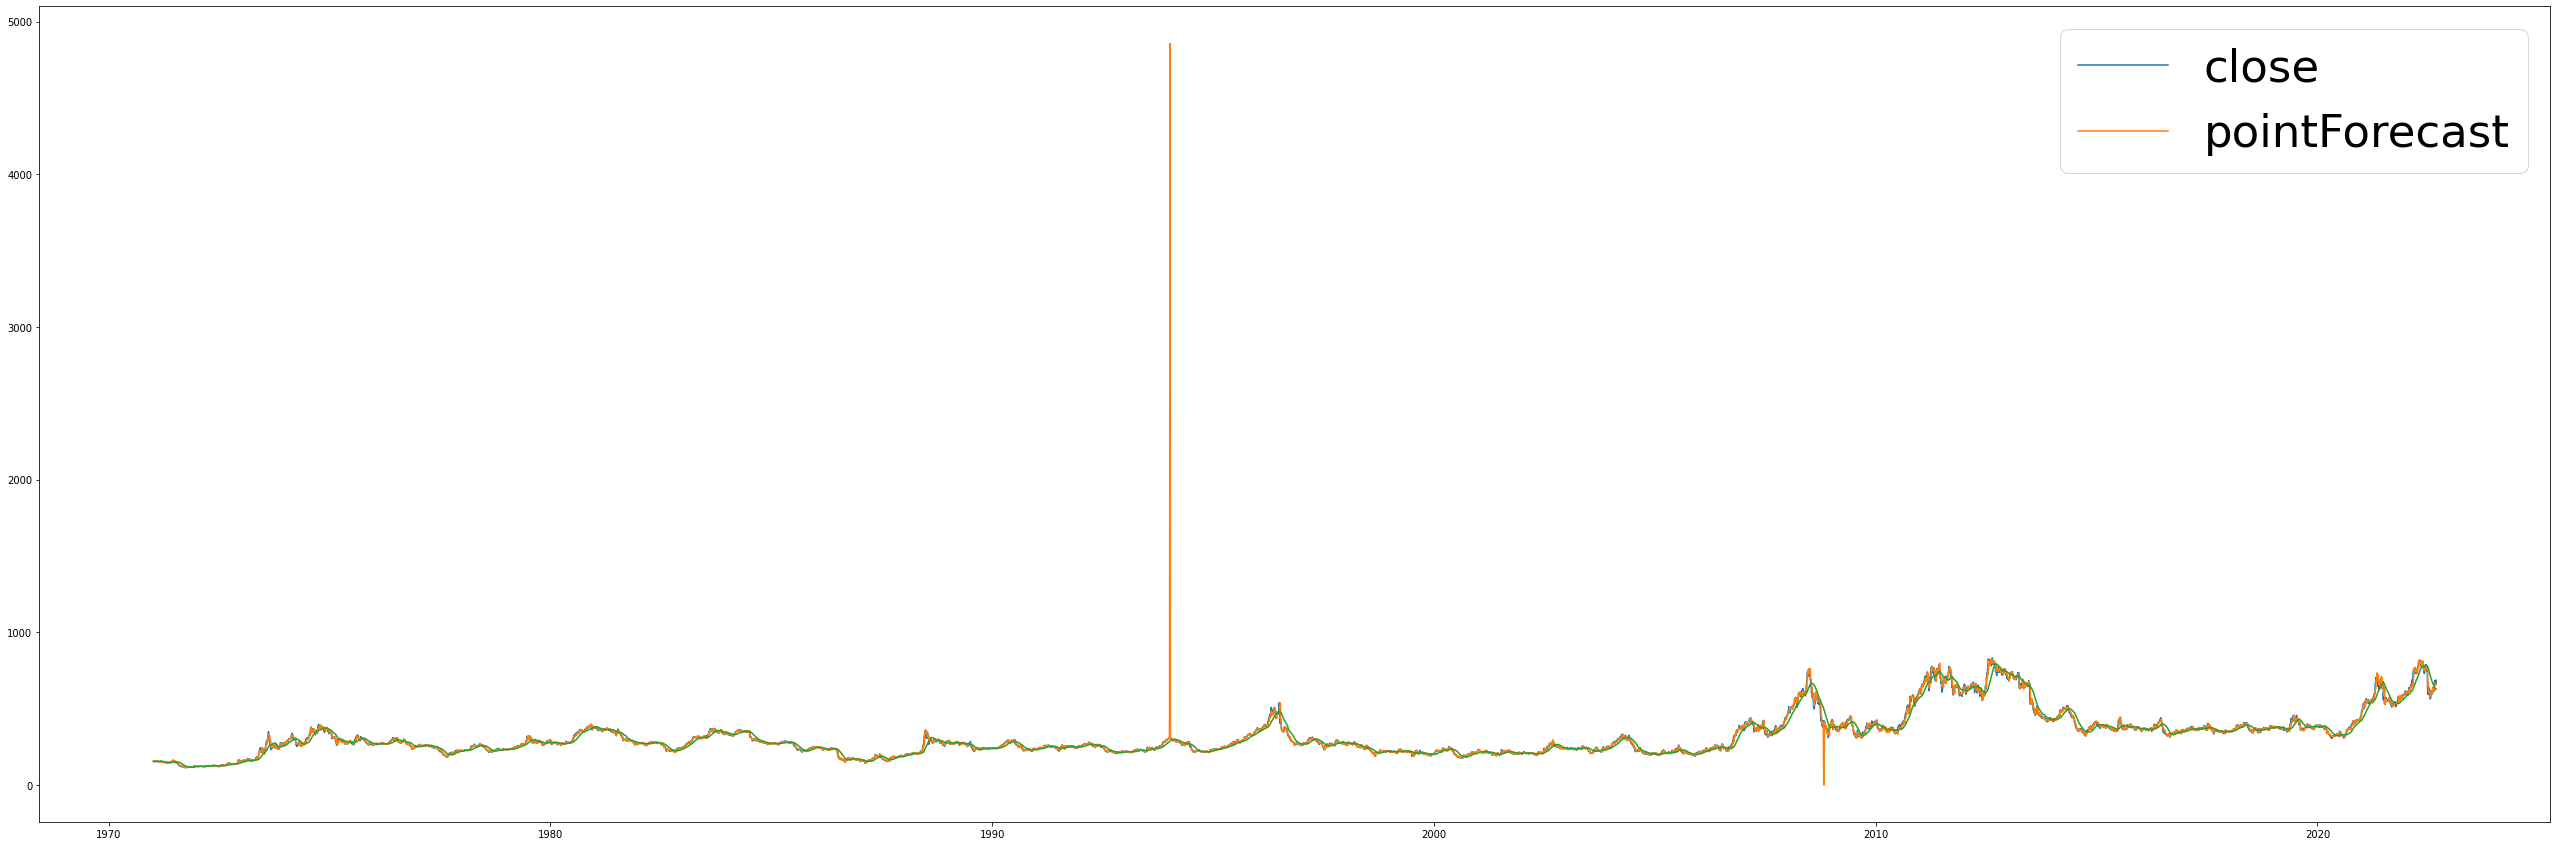

In [ ]:
plt.figure(figsize=(45,15))

plt.plot(forecast_df['close'])
plt.plot(forecast_df['pointForecast'])
plt.plot(forecast_df['MA_50'])

plt.legend(['close','pointForecast'],fontsize=45)

plt.savefig(r'pnl.jpg')

plt.show()

# Trade Analytics

In [ ]:
print("No. Trades:   ",len(positions['pnl']))
print("relative Pnl: ", relativepnl(positions['pnl']))
print("Hit Rate:     ", hitrate(positions['pnl']))
print("Minimum:      ",np.min(positions['pnl']))
print("Maximum:      ",np.max(positions['pnl']))
print("Mean:         ",np.mean(positions['pnl']))
print("Variance:     ",np.var(positions['pnl']))
print("Std. Dev:     ",np.sqrt(np.var(positions['pnl'])))
print("Skew:         ",skew(positions['pnl']))
print("Kurtosis:     ",kurtosis(positions['pnl']))

No. Trades:    2599
relative Pnl:  1.9772066836178714
Hit Rate:      0.7929176289453426
Minimum:       -65.75
Maximum:       108.25
Mean:          1.5532621247113163
Variance:      104.57217878309972
Std. Dev:      10.226053920408386
Skew:          nan
Kurtosis:      nan


# Metadata

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
metadata = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_strategies\corn_arma_ma\output\arma_(3,3)\metadata_corn_(3, 3)_True_5.csv')

In [ ]:
metadata.head()

,Unnamed: 0,asofdate,aic,bic,hqic,mae,mse,rsquare,forecastHorizon,diff,...,order_p,order_q,time,product_name,ar.L1.close,ar.L2.close,ar.L3.close,ma.L1.close,ma.L2.close,ma.L3.close
0,0,1970-01-05 01:00:00+00:00,-1583.810425,-1555.574992,-1572.449072,0.006665,0.000102,0.925075,5,True,...,3,3,0 days 00:00:01.899741,corn,0.408328,0.072931,0.311011,0.430627,0.066138,0.392757
1,1,1970-01-12 01:00:00+00:00,-1582.307735,-1554.072302,-1570.946382,0.006636,0.000103,0.927432,5,True,...,3,3,0 days 00:00:01.174573,corn,0.357774,0.066481,0.312226,0.384542,0.068363,0.380892
2,2,1970-01-19 01:00:00+00:00,-1579.101939,-1550.866507,-1567.740586,0.006812,0.000104,0.941557,5,True,...,3,3,0 days 00:00:01.288052,corn,0.622504,0.231416,0.357345,0.617556,0.209650,0.394116
3,3,1970-01-26 01:00:00+00:00,-1581.530221,-1553.294788,-1570.168868,0.006725,0.000103,0.923683,5,True,...,3,3,0 days 00:00:01.364757,corn,0.314182,0.049815,0.271564,0.338545,0.037263,0.333754
4,4,1970-02-02 01:00:00+00:00,-1577.310148,-1549.074716,-1565.948795,0.006869,0.000105,0.939902,5,True,...,3,3,0 days 00:00:01.035818,corn,0.614892,0.231140,0.350850,0.610716,0.213894,0.388334


In [ ]:
metadata.mean(axis=0).to_csv(f"""{metadata['product_name'][0]}_arma_({metadata['order_p'][0]},{metadata['order_q'][0]}).csv""")


In [ ]:
metadata.var(axis=0)

Unnamed: 0         514809.166667
aic                 24395.464032
bic                 24395.464032
hqic                24395.464032
mae                     0.004438
mse                     0.047992
rsquare            153077.555829
forecastHorizon         0.000000
diff                    0.000000
trainDFLength           0.000000
num_models              0.000000
order_p                 0.000000
order_q                 0.000000
ar.L1.close             0.114383
ar.L2.close             0.111724
ar.L3.close             0.086466
ma.L1.close             0.115056
ma.L2.close             0.121398
ma.L3.close             0.095150
dtype: float64

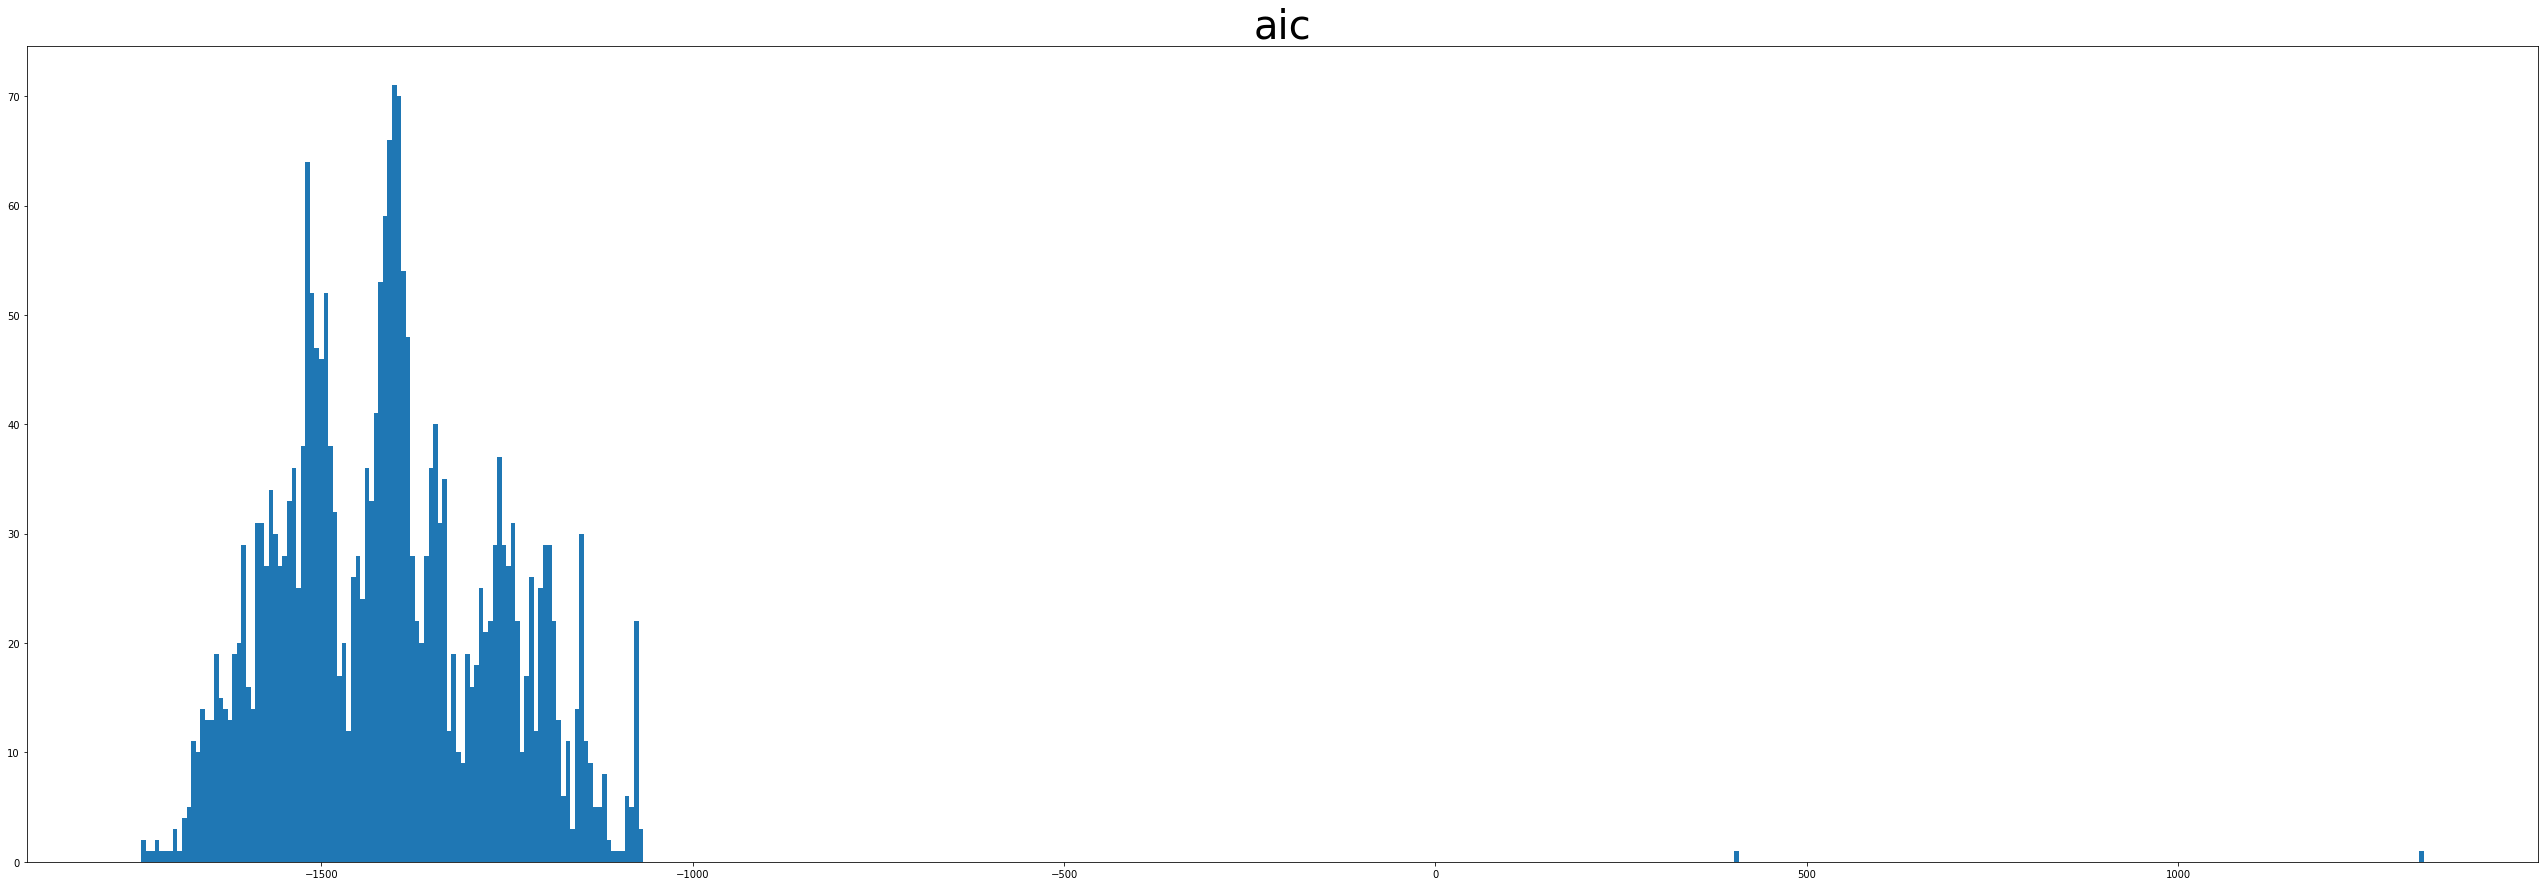

In [ ]:
plt.figure(figsize=(45,15))

plt.title('aic',fontsize=40)

plt.hist(metadata['aic'],bins=500)

plt.show()

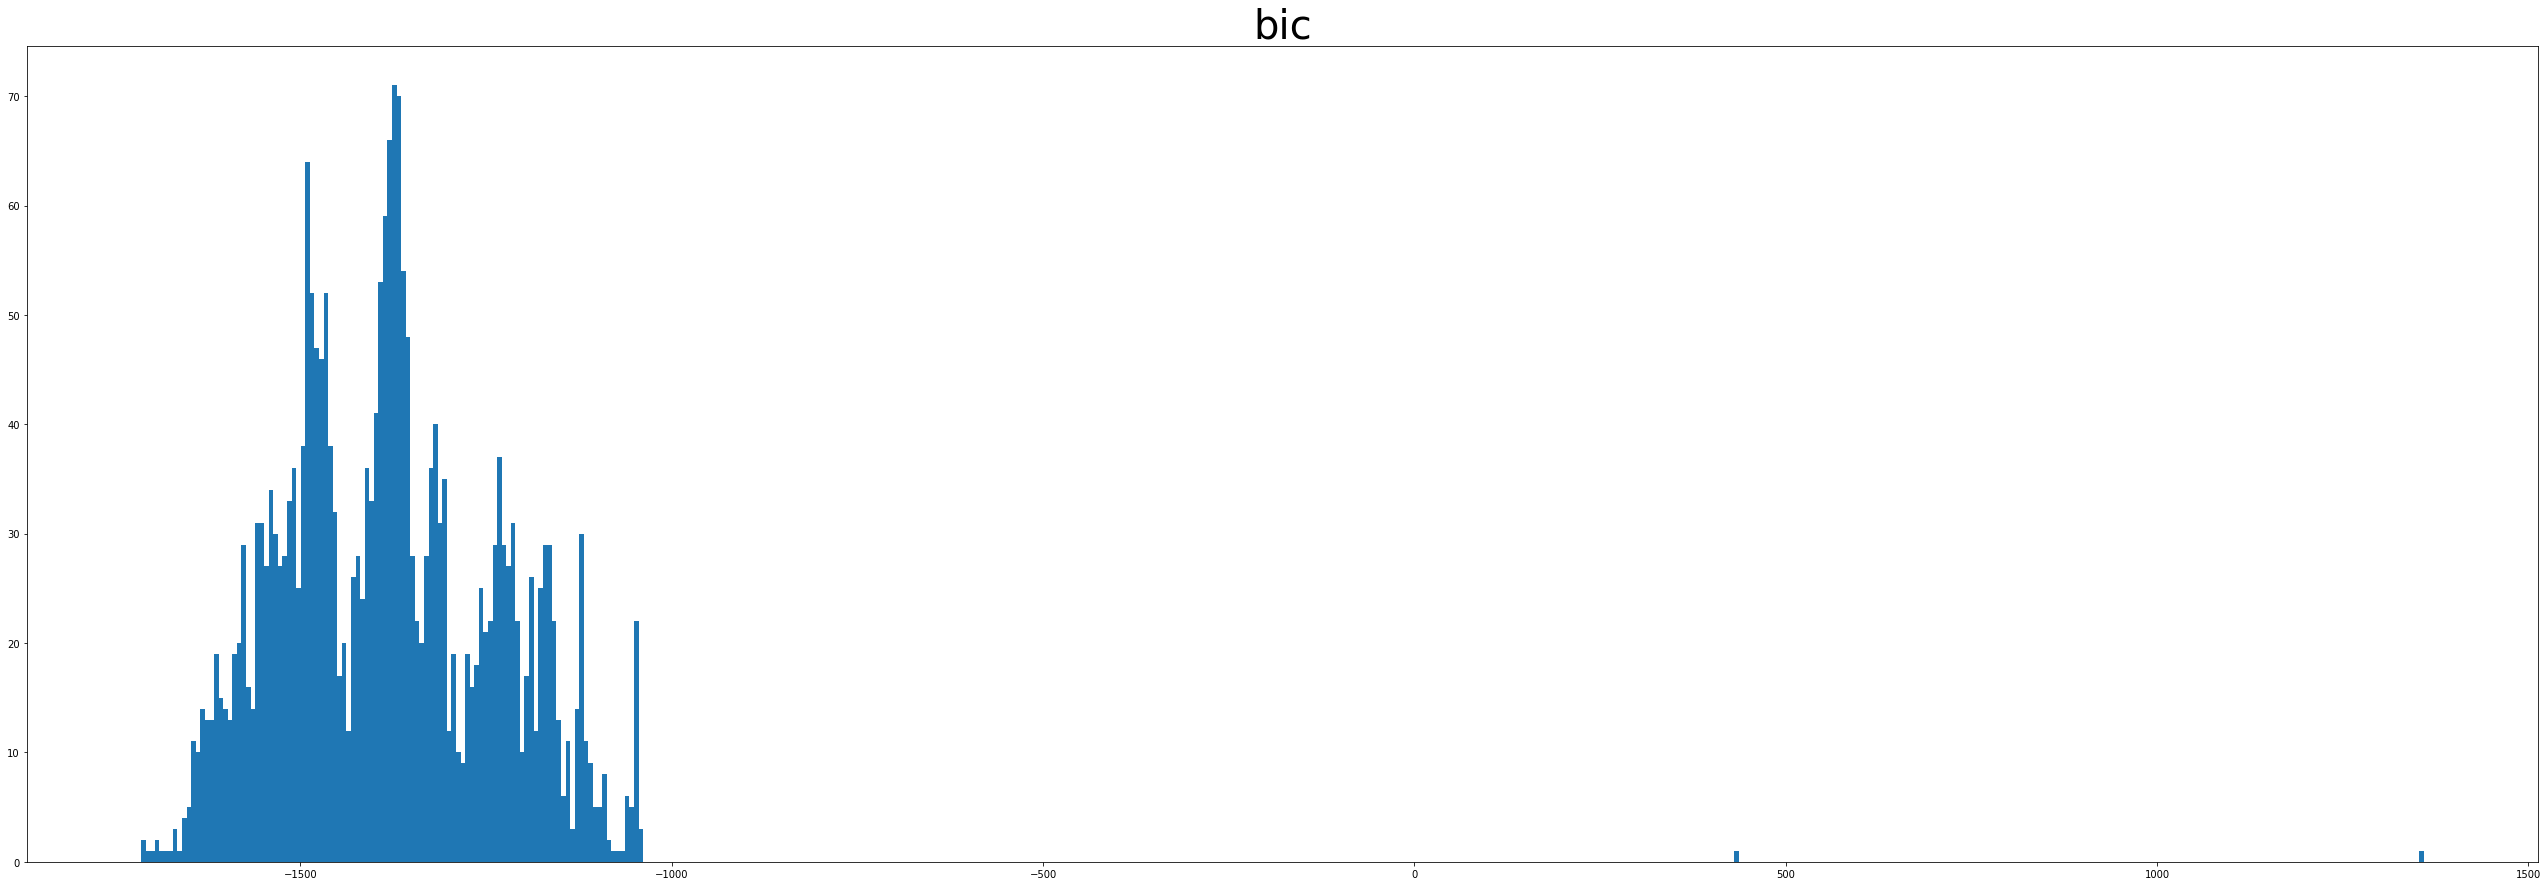

In [ ]:
plt.figure(figsize=(45,15))

plt.title('bic',fontsize=40)

plt.hist(metadata['bic'],bins=500)

plt.show()

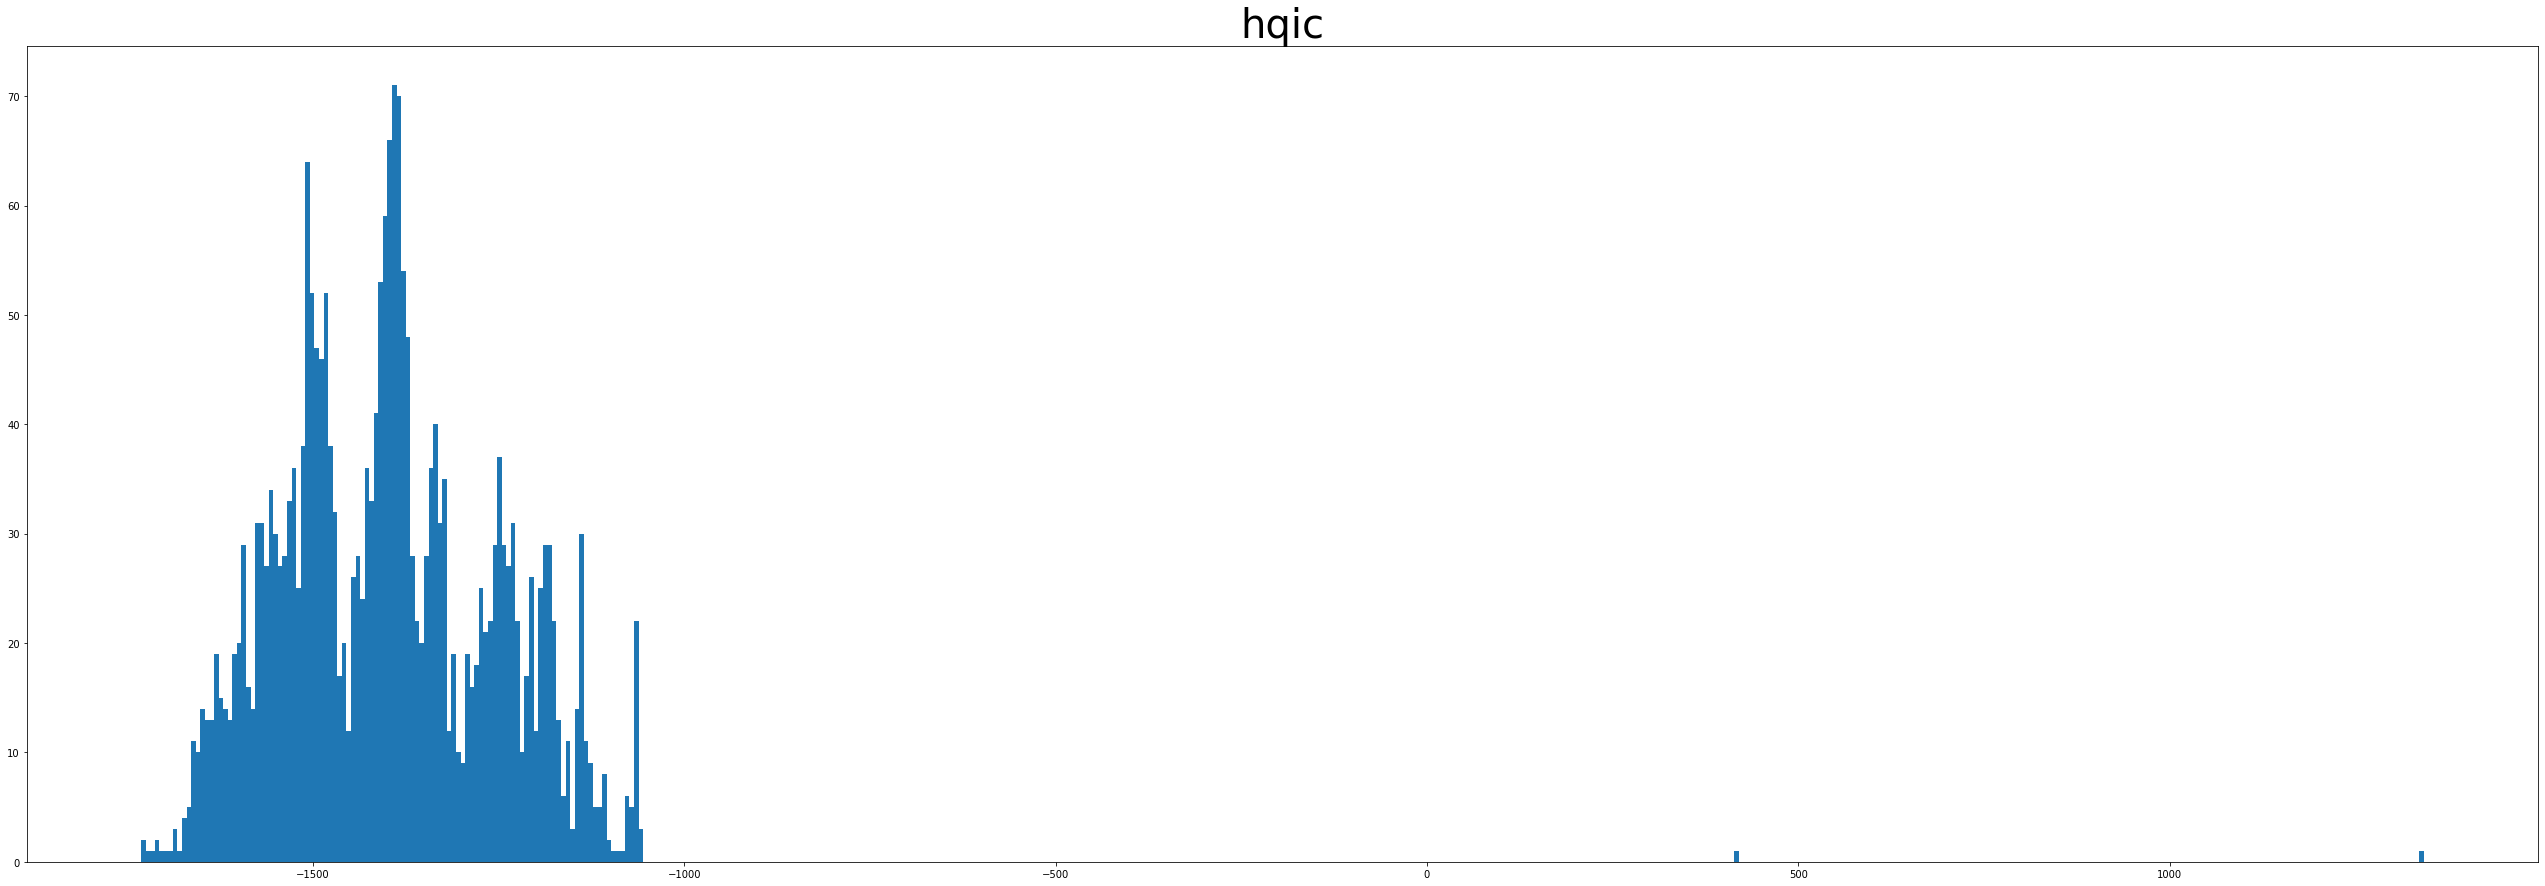

In [ ]:
plt.figure(figsize=(45,15))

plt.title('hqic',fontsize=40)

plt.hist(metadata['hqic'],bins=500)

plt.show()

In [ ]:
metadata.columns

Index(['Unnamed: 0', 'asofdate', 'aic', 'bic', 'hqic', 'mae', 'mse', 'rsquare',
       'forecastHorizon', 'diff', 'trainDFLength', 'num_models', 'order_p',
       'order_q', 'time', 'product_name', 'ar.L1.close', 'ar.L2.close',
       'ar.L3.close', 'ma.L1.close', 'ma.L2.close', 'ma.L3.close'],
      dtype='object')

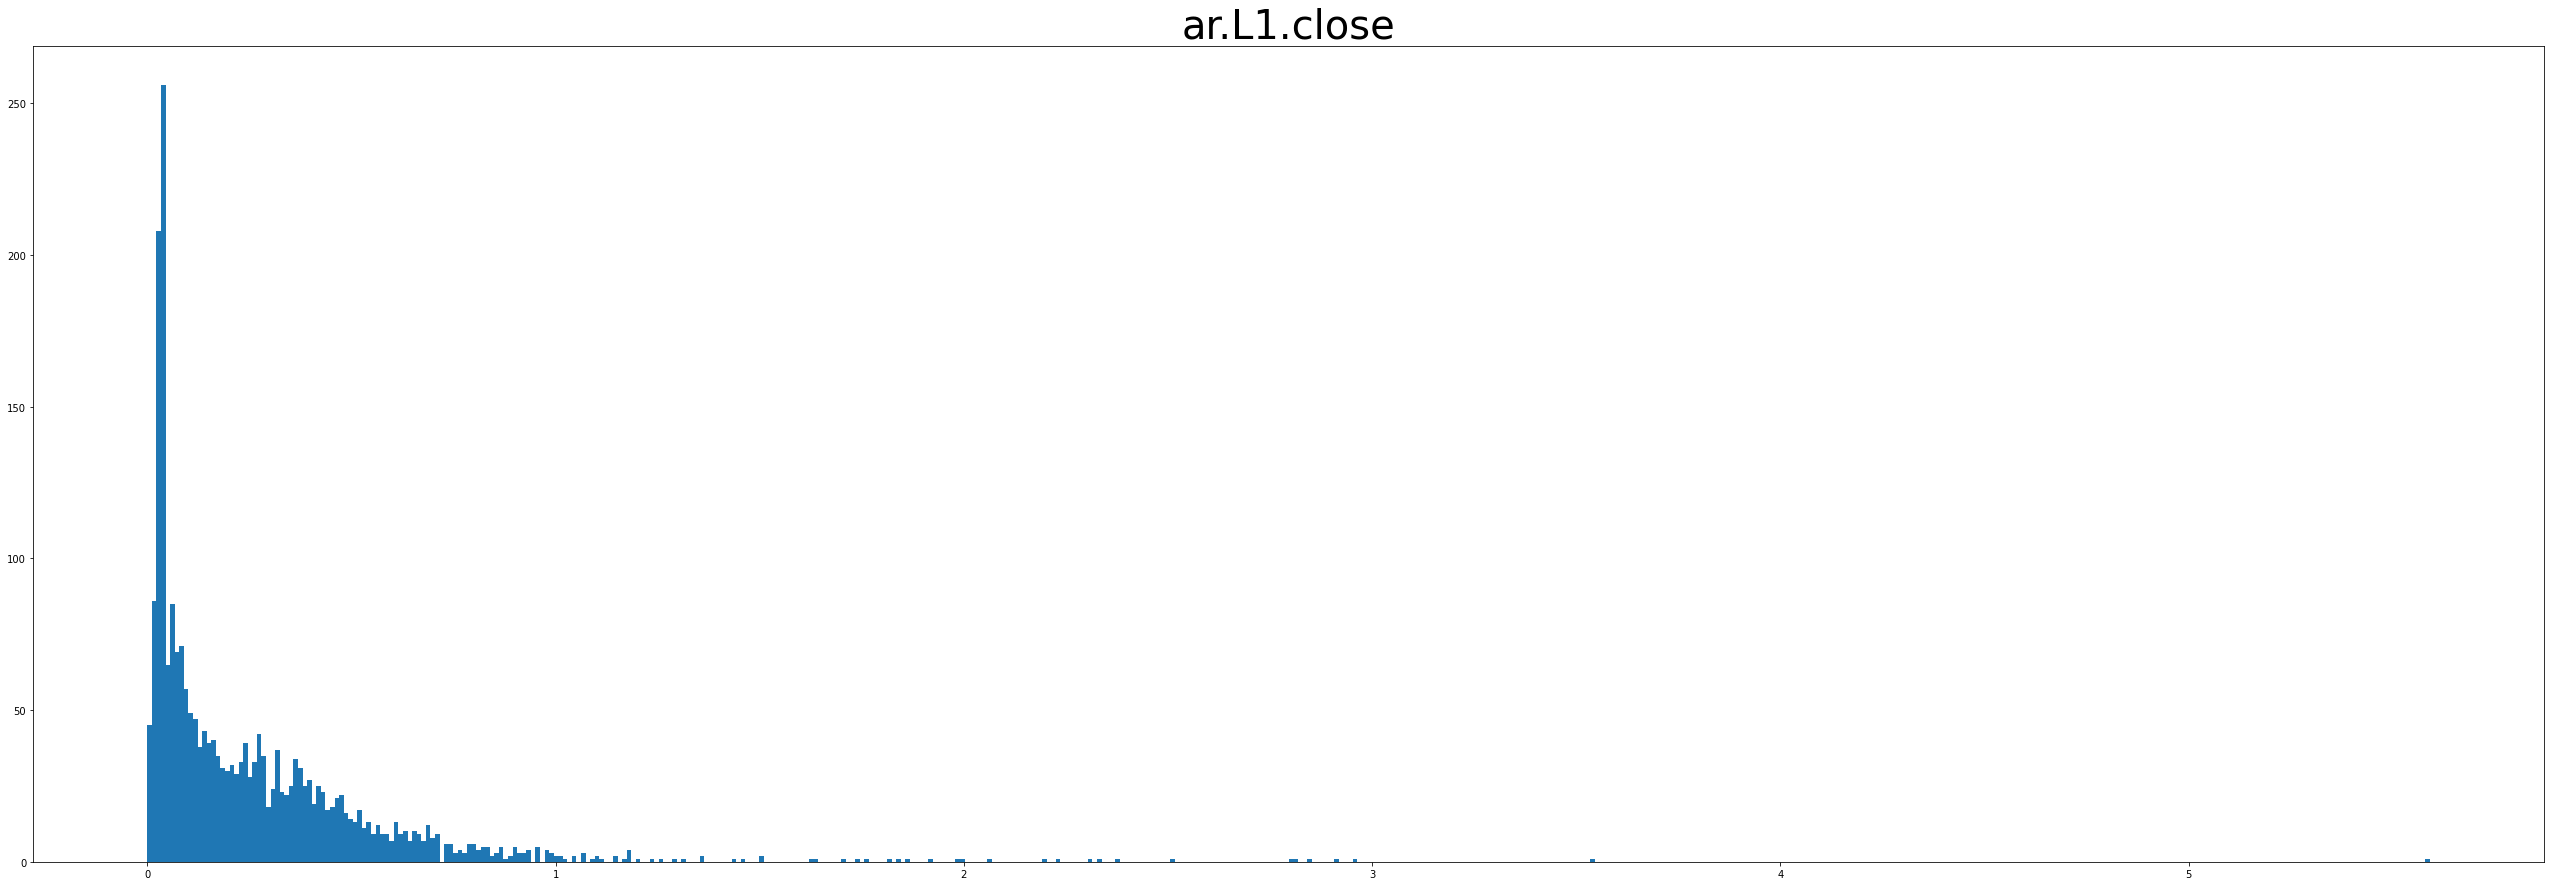

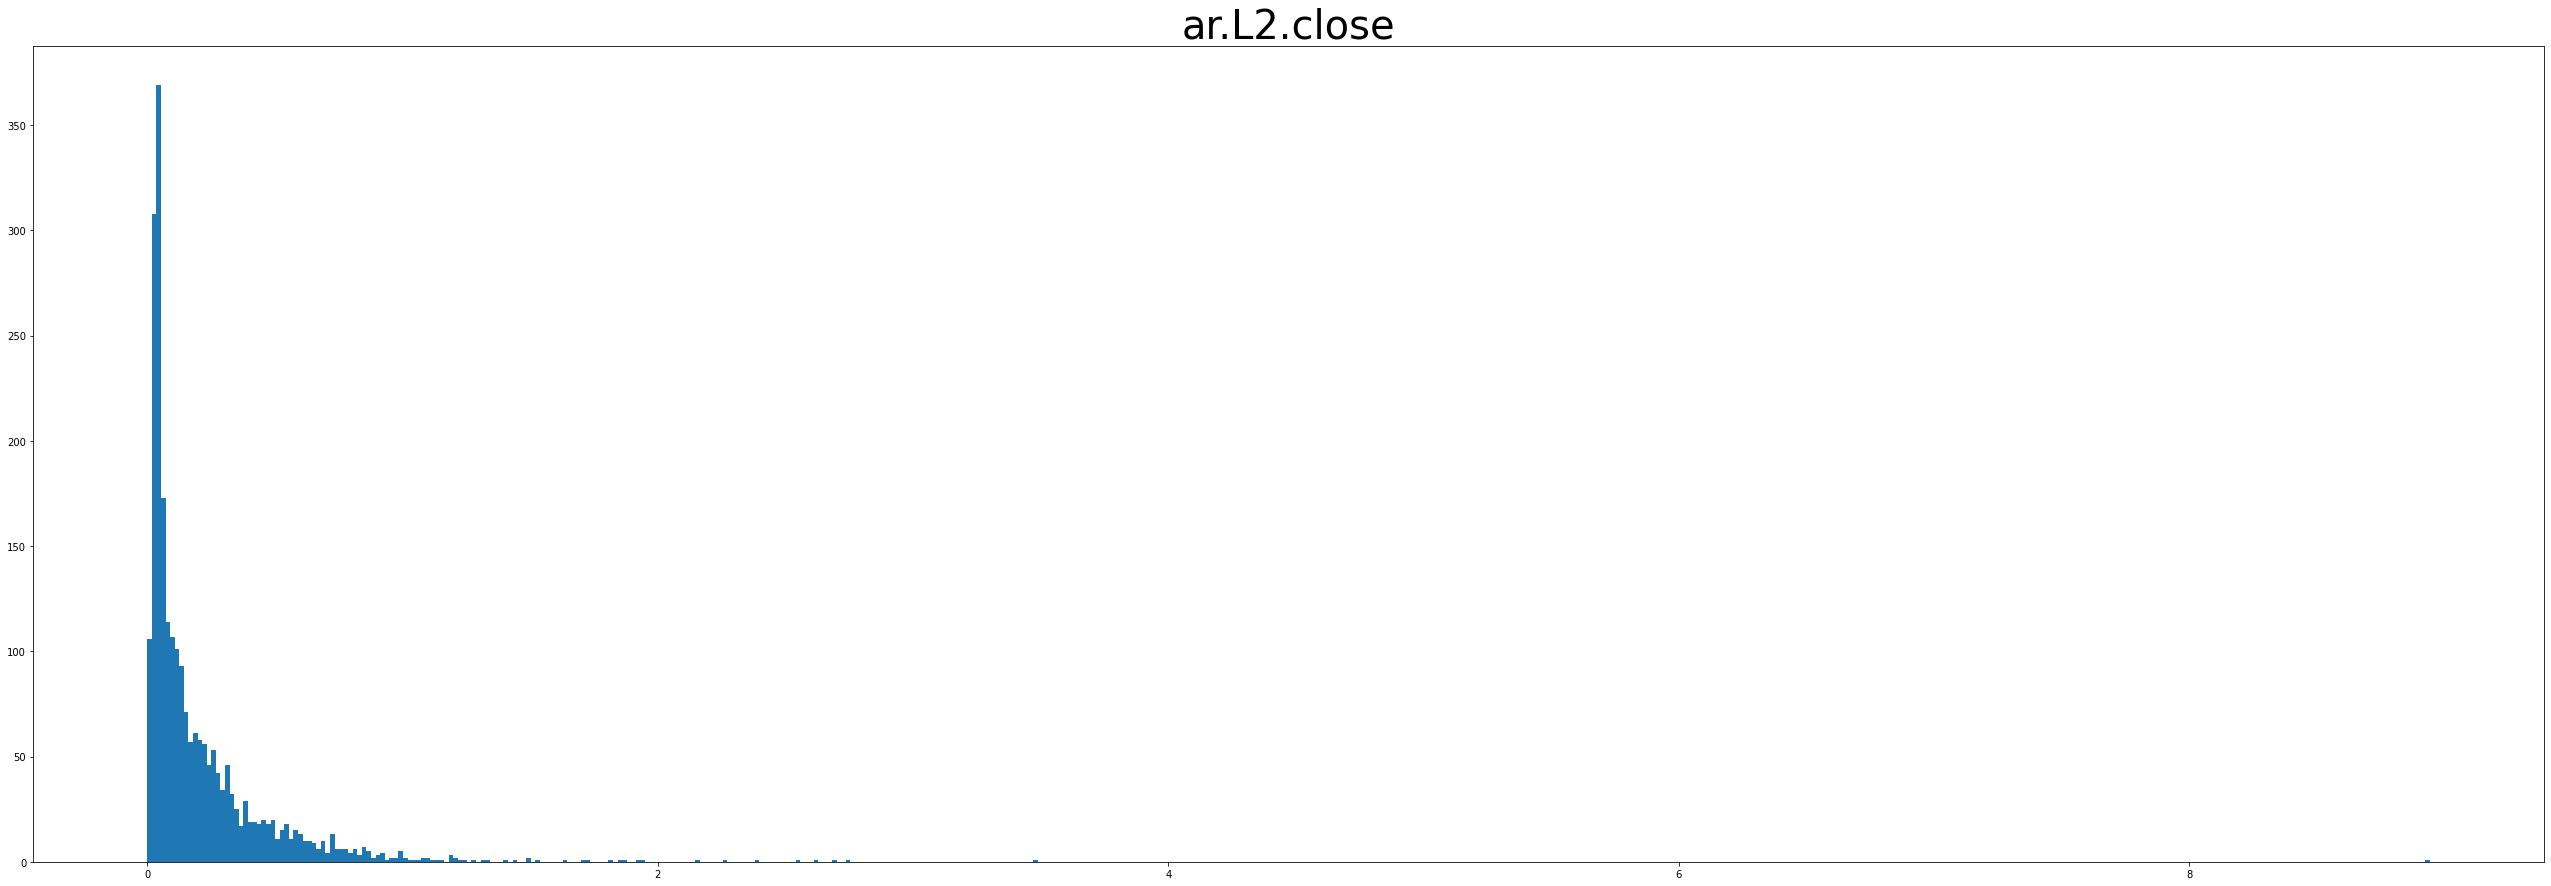

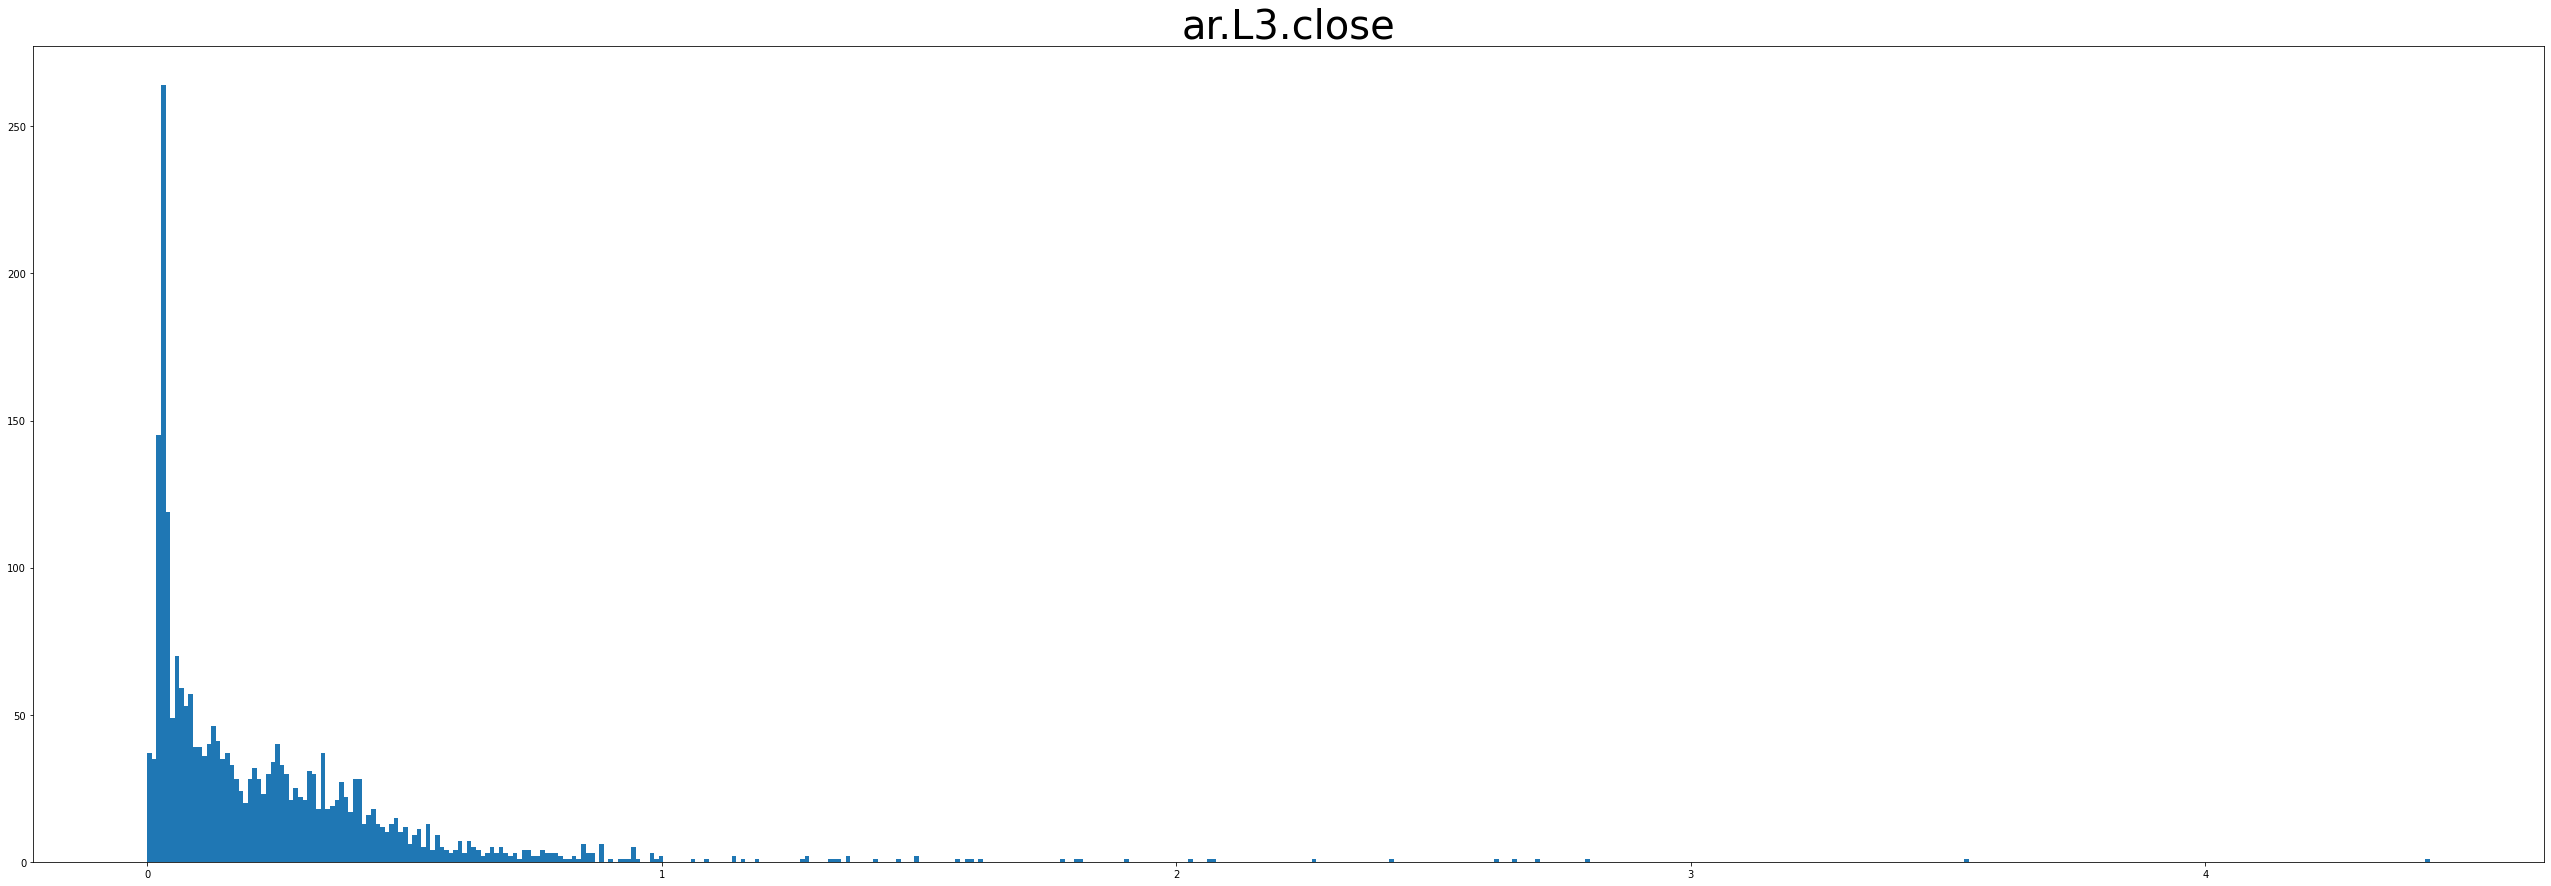

In [ ]:
for i in range(1,metadata['order_p'][0]+1):

    plt.figure(figsize=(45,15))

    plt.title(f'ar.L{i}.close',fontsize=40)
    plt.hist(metadata[f'ar.L{i}.close'],bins=500)

    plt.show()

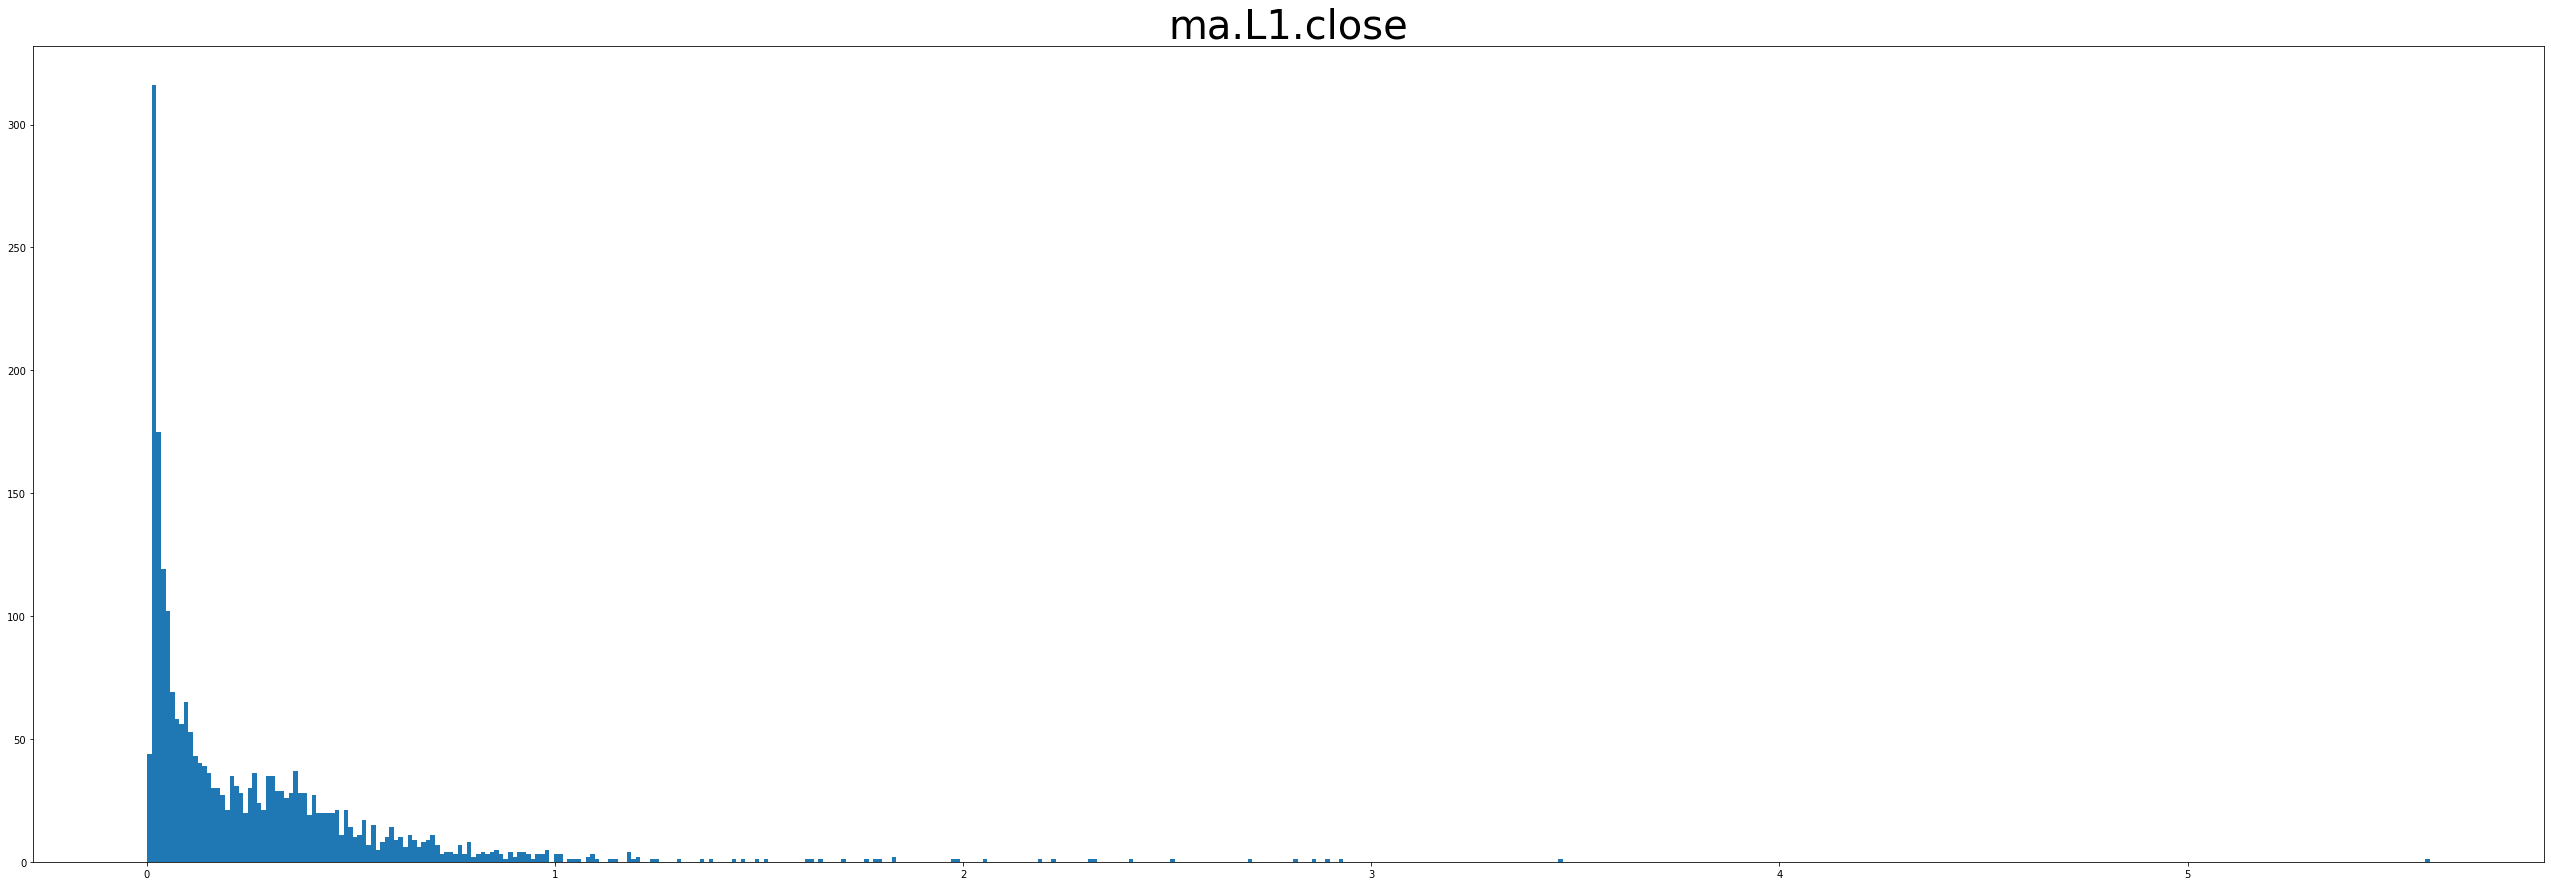

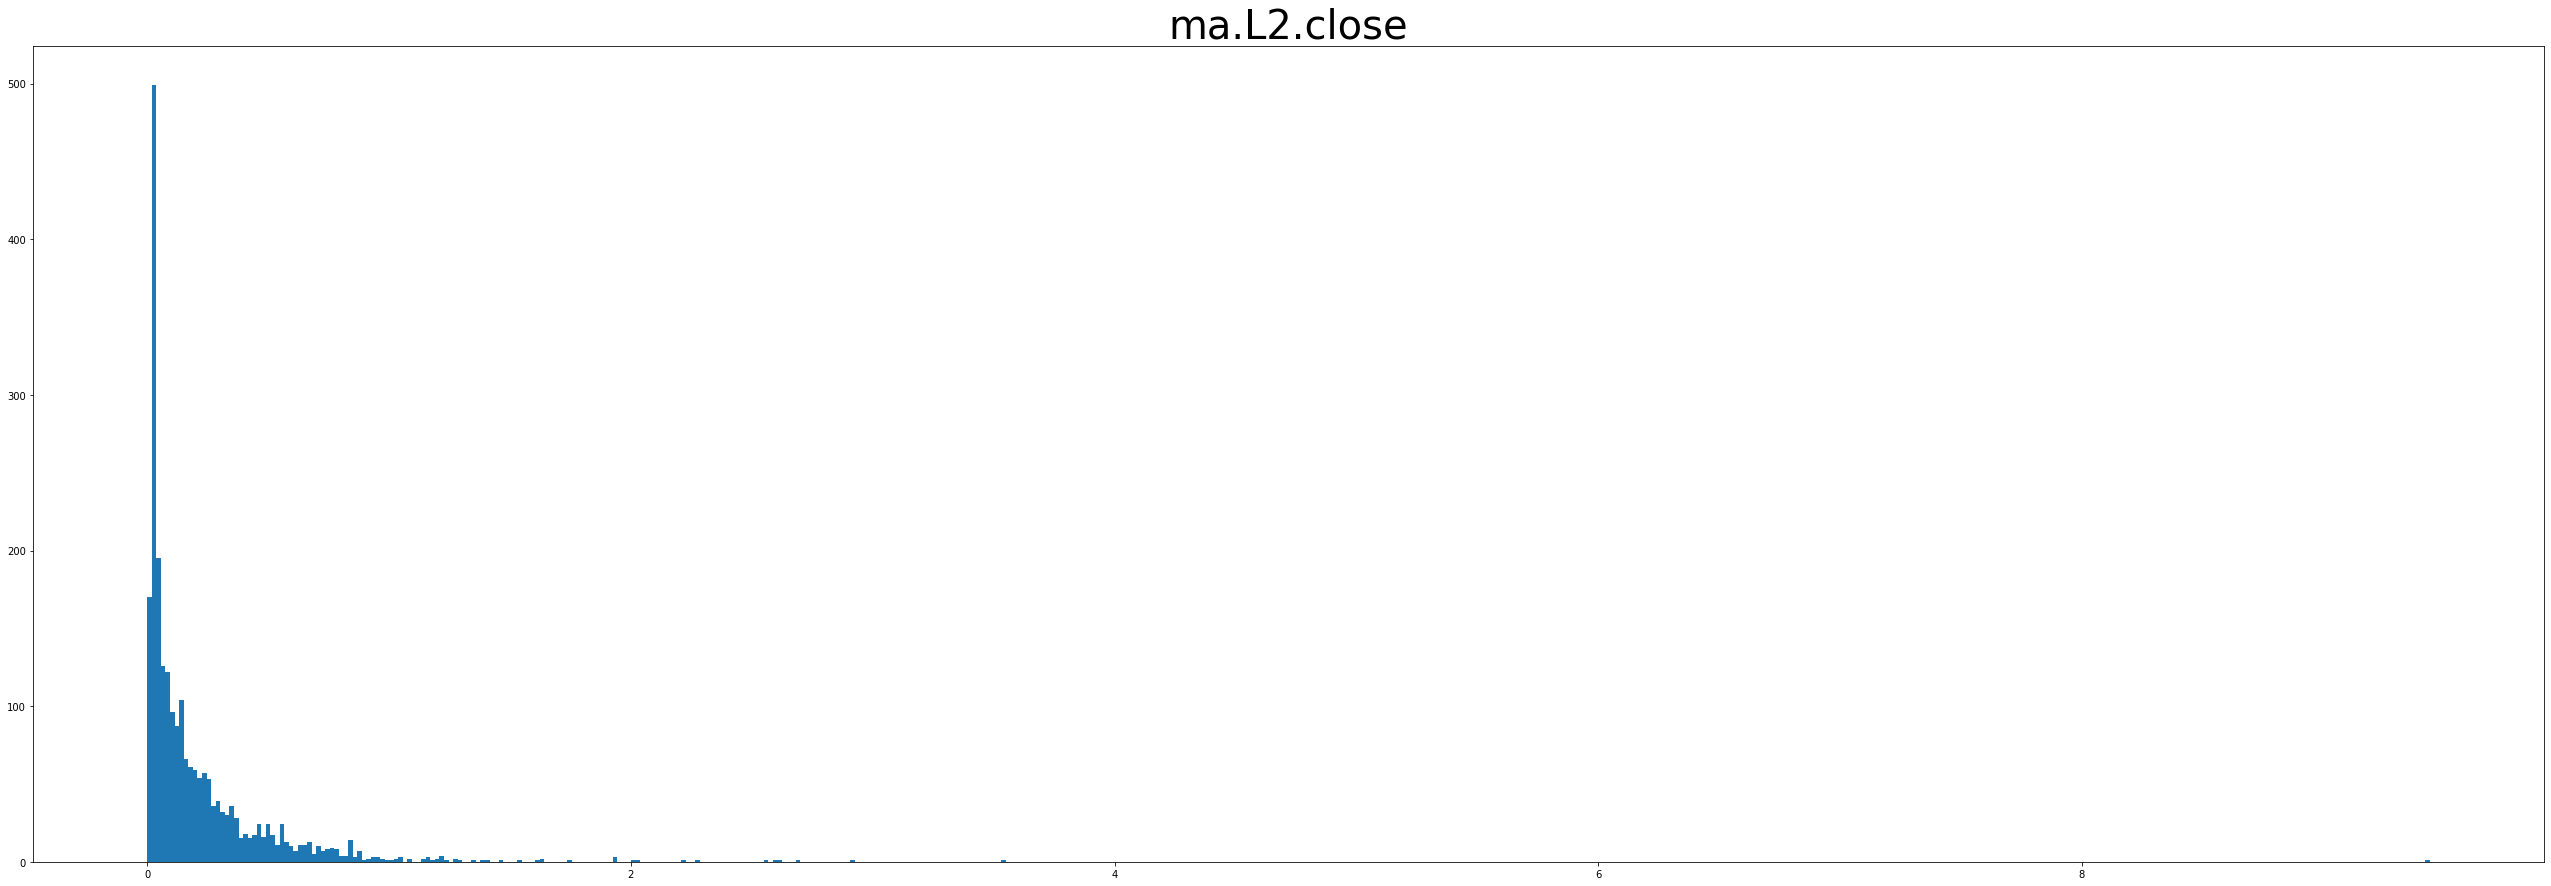

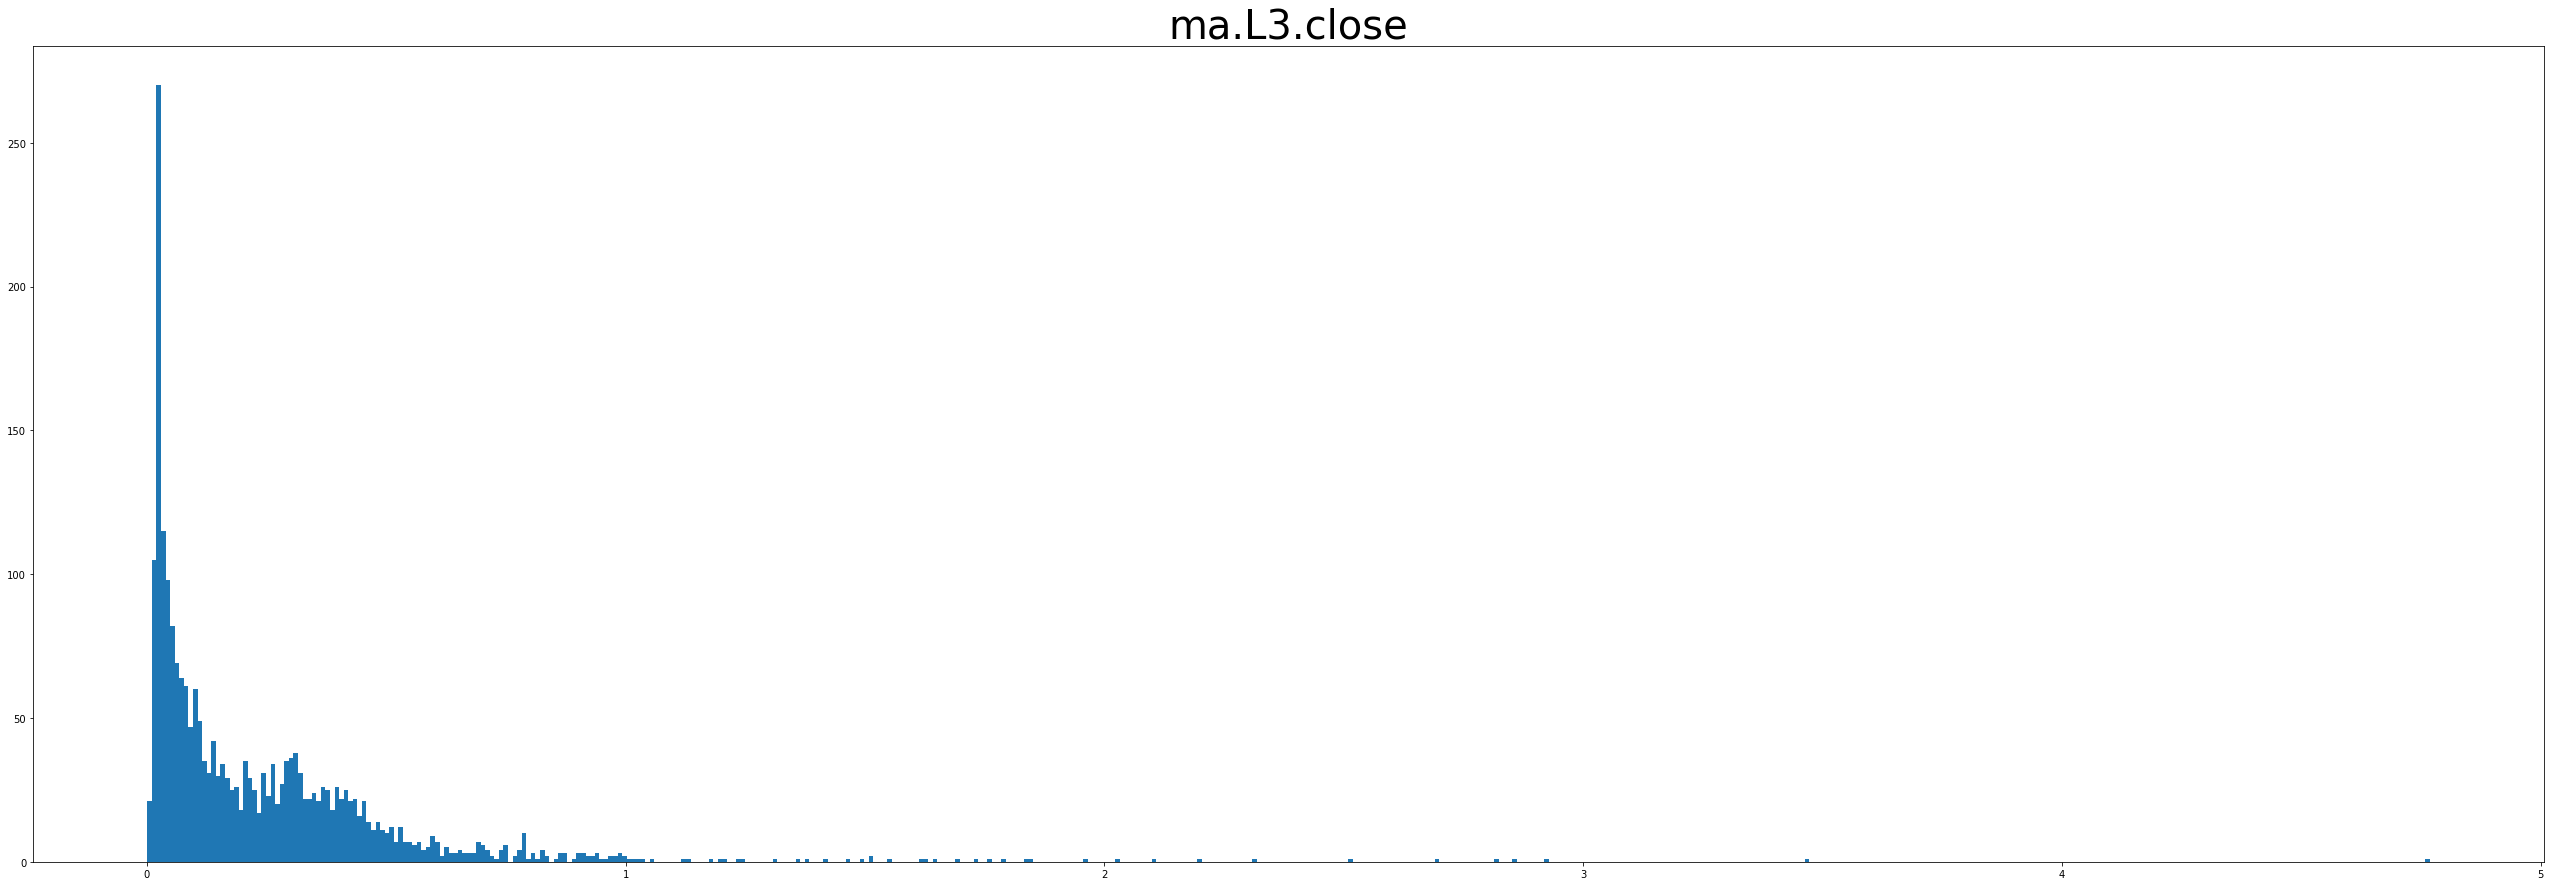

In [ ]:
for i in range(1,metadata['order_q'][0]+1):

    plt.figure(figsize=(45,15))

    plt.title(f'ma.L{i}.close',fontsize=40)
    plt.hist(metadata[f'ma.L{i}.close'],bins=500)

    plt.show()

# Forecast Analysis

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
def breakdown_forecast_error(forecast_dataframe):
    
    cacheForecastDayError = {

        'forecastday':[],
        'forecasterror':[],
    }

    for l in forecast_dataframe['forecastday'].unique():
        cacheForecastDayError['forecastday'].append(l)
        cacheForecastDayError['forecasterror'].append((forecast_dataframe[forecast_dataframe['forecastday'] == l]['pointForecast']\
                                                     - forecast_dataframe[forecast_dataframe['forecastday'] == l]['close']).mean())

    return pd.DataFrame(cacheForecastDayError).set_index('forecastday')

In [ ]:
forecast_dataframe = pd.read_csv(r'C:\Users\James Stanley\Documents\GitHub\backtest_utilities\approved_strategies\corn_arma_ma\output\arma_(1,0)\forecasts_corn_(1, 0)_True_5.csv')

In [ ]:
forecast_error = breakdown_forecast_error(forecast_dataframe)
forecast_error.head()

,forecasterror
forecastday,
1,0.153158
2,0.096123
3,-0.053591
4,-0.098091
5,-0.114828


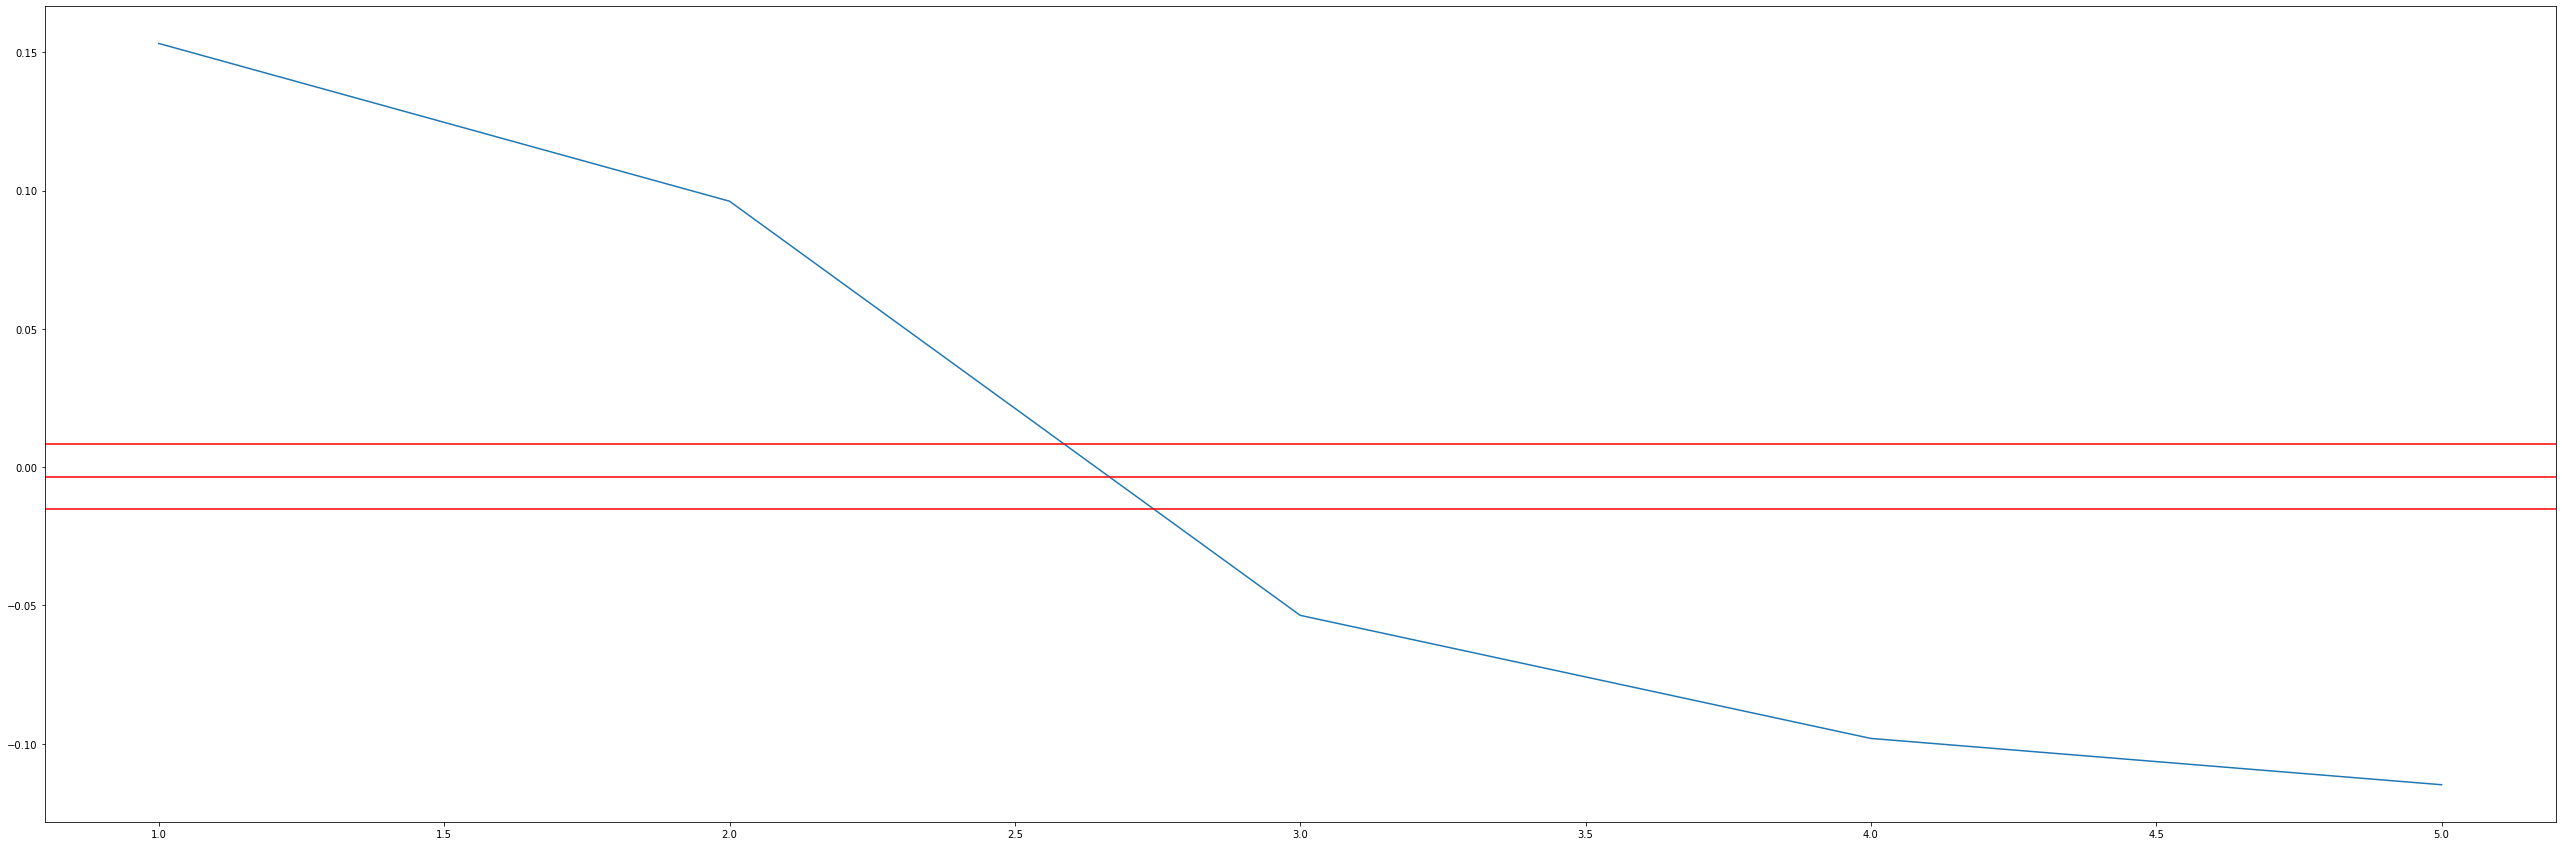

In [ ]:
plt.figure(figsize=(45,15))

plt.plot(forecast_error['forecasterror'])

plt.axhline(np.mean(forecast_error['forecasterror']),color = 'red')
plt.axhline(np.mean(forecast_error['forecasterror'])+np.var(forecast_error['forecasterror']),color = 'red')
plt.axhline(np.mean(forecast_error['forecasterror'])-np.var(forecast_error['forecasterror']),color = 'red')

plt.show()